In [30]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

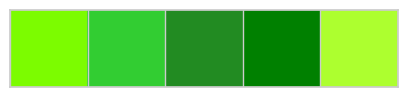

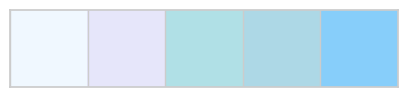

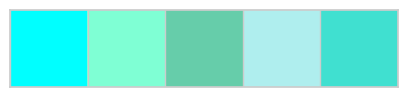

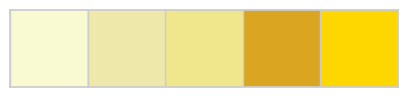

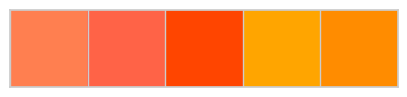

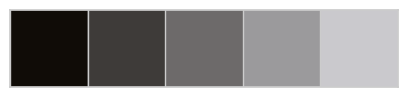

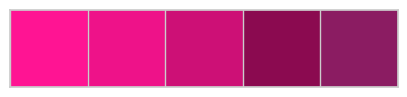

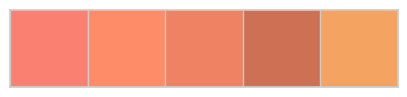

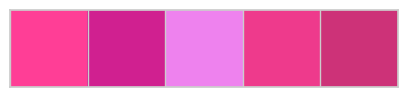

In [31]:
# --- Create List of Color Palletes ---
green_grad = ['#7CFC00', '#32CD32', '#228B22', '#008000', '#ADFF2F']
blue_grad = ['#F0F8FF', '#E6E6FA', '#B0E0E6', '#ADD8E6', '#87CEFA']
cyan_grad = ['#00FFFF', '#7FFFD4', '#66CDAA', '#AFEEEE', '#40E0D0']
gold_grad = ['#FAFAD2', '#EEE8AA', '#F0E68C', '#DAA520', '#FFD700']
coral_grad = ['#FF7F50', '#FF6347', '#FF4500', '#FFA500', '#FF8C00']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
pink_grad = ['#FF1493', '#EE1289', '#CD1076', '#8B0A50', '#8B1C62']
brown_grad = ['#FA8072', '#FF8C69', '#EE8262', '#CD7054', '#F4A460']
purple_grad = ['#FF3E96', '#D02090', '#EE82EE','#EE3A8C', '#CD3278']

# --- Plot Color Palletes --
sns.palplot(green_grad)
sns.palplot(blue_grad)
sns.palplot(cyan_grad)
sns.palplot(gold_grad)
sns.palplot(coral_grad)
sns.palplot(black_grad)
sns.palplot(pink_grad)
sns.palplot(brown_grad)
sns.palplot(purple_grad)

In [32]:
# --- Importing Dataset ---
df = pd.read_csv("/kaggle/input/old-uci-dataset-for-heart-disease/Heart_Disease_Prediction_UCI_old_data.csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Pastel1').set_properties(**{'font-family': 'Bodoni'}).hide_index()

Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
70,1,4,130,322,0,2,109,0,2.400000,2,3,3,Presence
67,0,3,115,564,0,2,160,0,1.600000,2,0,7,Absence
57,1,2,124,261,0,0,141,0,0.300000,1,0,7,Presence
64,1,4,128,263,0,0,105,1,0.200000,2,1,7,Absence
74,0,2,120,269,0,2,121,1,0.200000,1,1,3,Absence


In [33]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
       'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
       'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium', 'Heart_Disease'],
      dtype='object')

In [34]:
# --- Print Dataset Info ---
print('\033[1m'+':: Dataset Info ::'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+':: Dataset Details ::'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

:: Dataset Info ::
******************************
Total Rows: 270
Total Columns: 14
******************************


:: Dataset Details ::
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_

In [35]:
# --- Fix Data Types ---
lst=['Sex', 'Chest_pain_type', 'FBS_over_120', 'EKG_results', 'Exercise_angina', 'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']
df[lst] = df[lst].astype(object)

******************************
:: Sex (Gender) Total ::
******************************


1    183
0     87
Name: Sex, dtype: int64

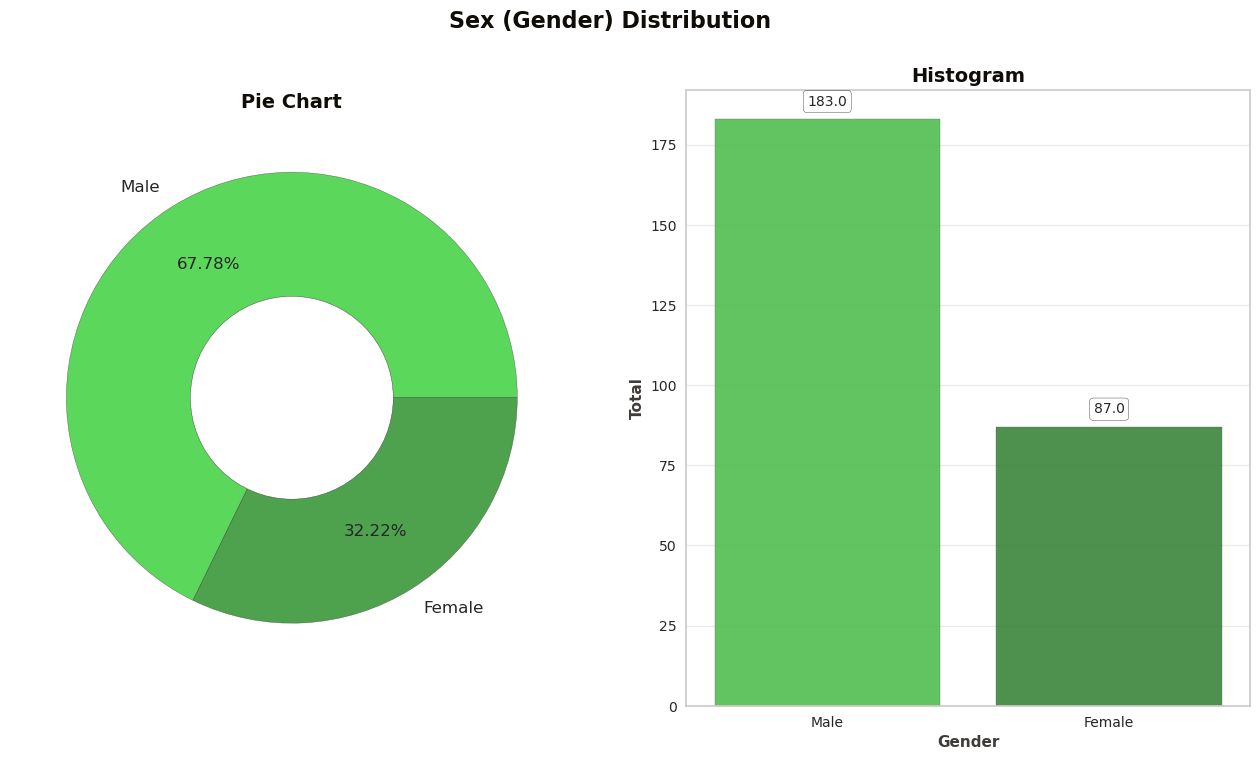

In [36]:
# --- Setting Colors, Labels, Order ---
colors=green_grad[1:3]
labels=['Male', 'Female']
order=df['Sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Sex (Gender) Total ::'+'\033[1m')
print('*' * 30)
df.Sex.value_counts(dropna=False)

******************************
:: Chest pain type ::
******************************


4    129
3     79
2     42
1     20
Name: Chest_pain_type, dtype: int64

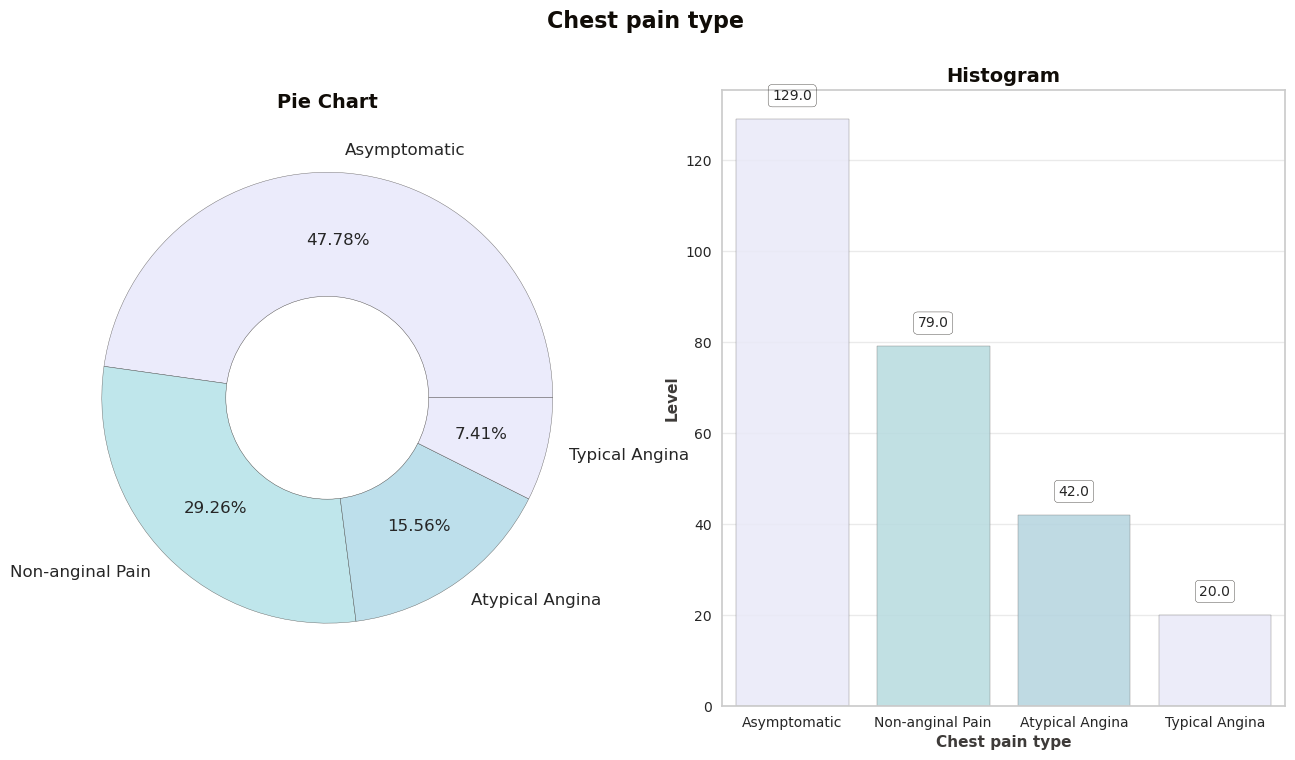

In [37]:
# --- Setting Colors, Labels, Order ---
colors=blue_grad[1:4]
labels=['Asymptomatic', 'Non-anginal Pain', 'Atypical Angina', 'Typical Angina']
order=df['Chest_pain_type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest pain type', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Chest_pain_type'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Chest_pain_type', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Chest pain type', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Chest pain type ::'+'\033[1m')
print('*' * 30)
df.Chest_pain_type.value_counts(dropna=False)

******************************
:: Fasting Blood Sugar ::
******************************


0    230
1     40
Name: FBS_over_120, dtype: int64

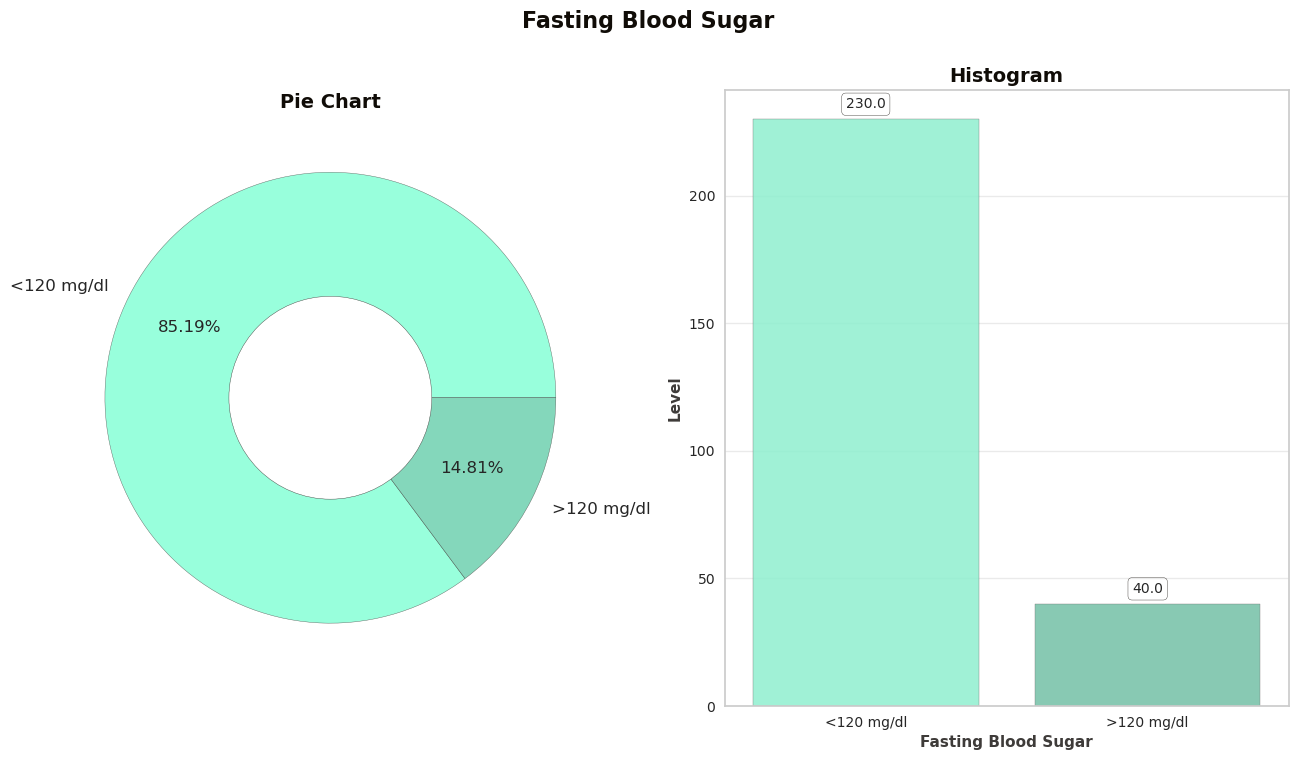

In [38]:
# --- Setting Colors, Labels, Order ---
colors=cyan_grad[1:4]
labels=['<120 mg/dl', '>120 mg/dl']
order=df['FBS_over_120'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['FBS_over_120'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='FBS_over_120', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Fasting Blood Sugar ::'+'\033[1m')
print('*' * 30)
df.FBS_over_120.value_counts(dropna=False)

******************************
:: Electrocardiogram Results ::
******************************


0    230
1     40
Name: FBS_over_120, dtype: int64

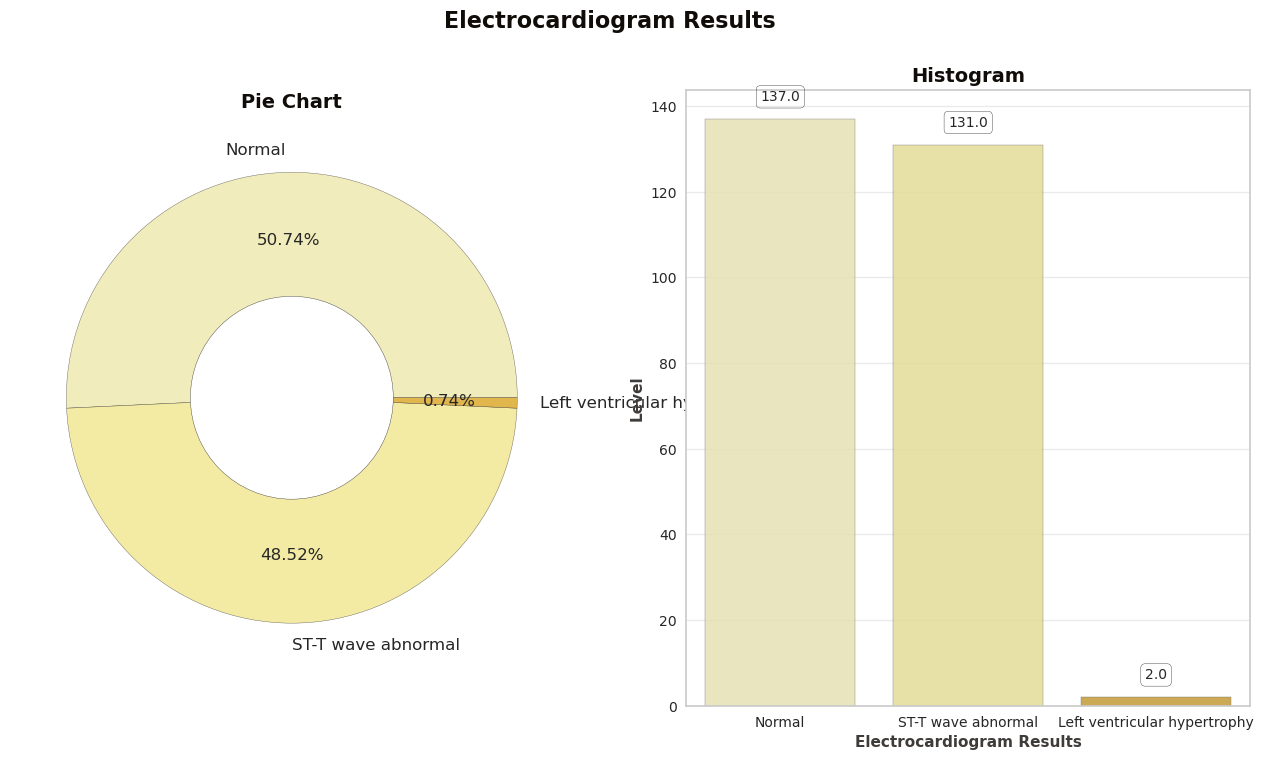

In [39]:
# --- Setting Colors, Labels, Order ---
colors=gold_grad[1:4]
labels=['Normal', 'ST-T wave abnormal', 'Left ventricular hypertrophy']
order=df['EKG_results'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Electrocardiogram Results', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['EKG_results'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='EKG_results', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Electrocardiogram Results', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Electrocardiogram Results ::'+'\033[1m')
print('*' * 30)
df.FBS_over_120.value_counts(dropna=False)

**************************************************
:: Exercise Induced Angina Pectoris (AP) ::
**************************************************


0    230
1     40
Name: FBS_over_120, dtype: int64

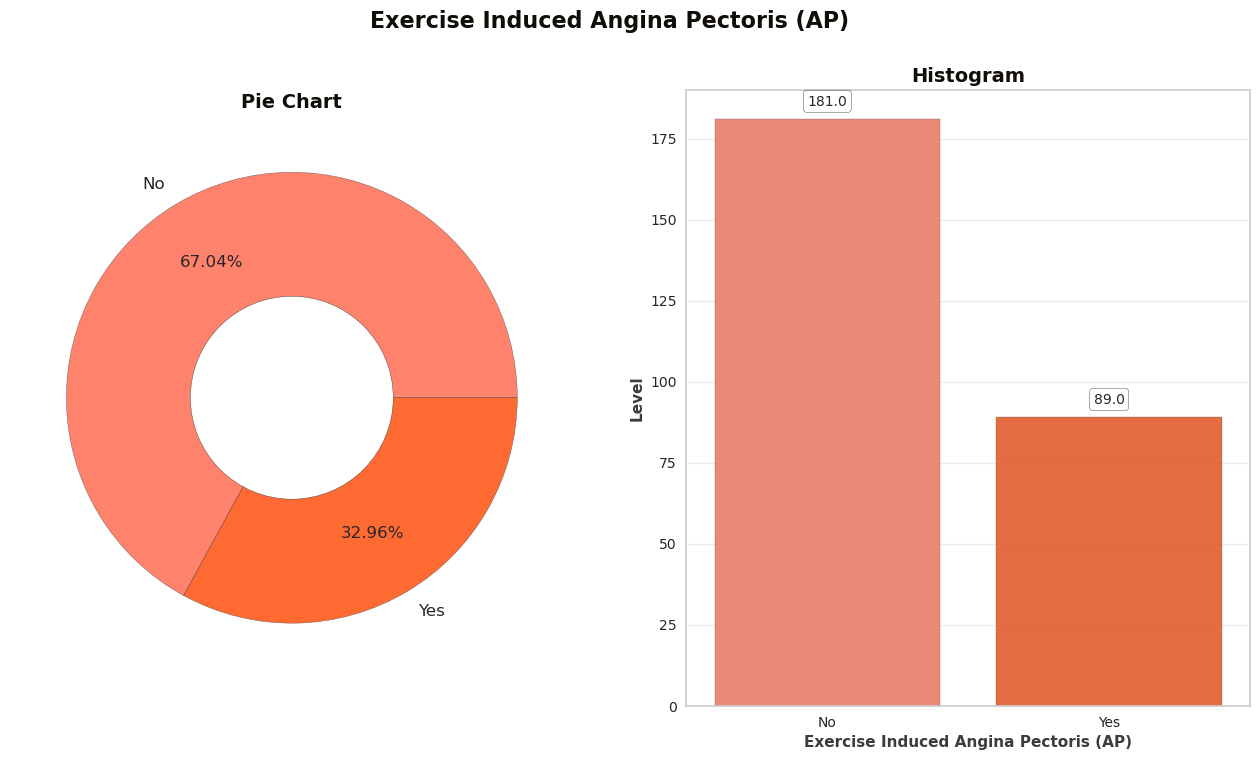

In [40]:
# --- Setting Colors, Labels, Order ---
colors=coral_grad[1:4]
labels=['No', 'Yes']
order=df['Exercise_angina'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Pectoris (AP)', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Exercise_angina'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Exercise_angina', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Exercise Induced Angina Pectoris (AP)', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+':: Exercise Induced Angina Pectoris (AP) ::'+'\033[1m')
print('*' * 50)
df.FBS_over_120.value_counts(dropna=False)

******************************
:: Slope of ST segment ::
******************************


1    130
2    122
3     18
Name: Slope_of_ST, dtype: int64

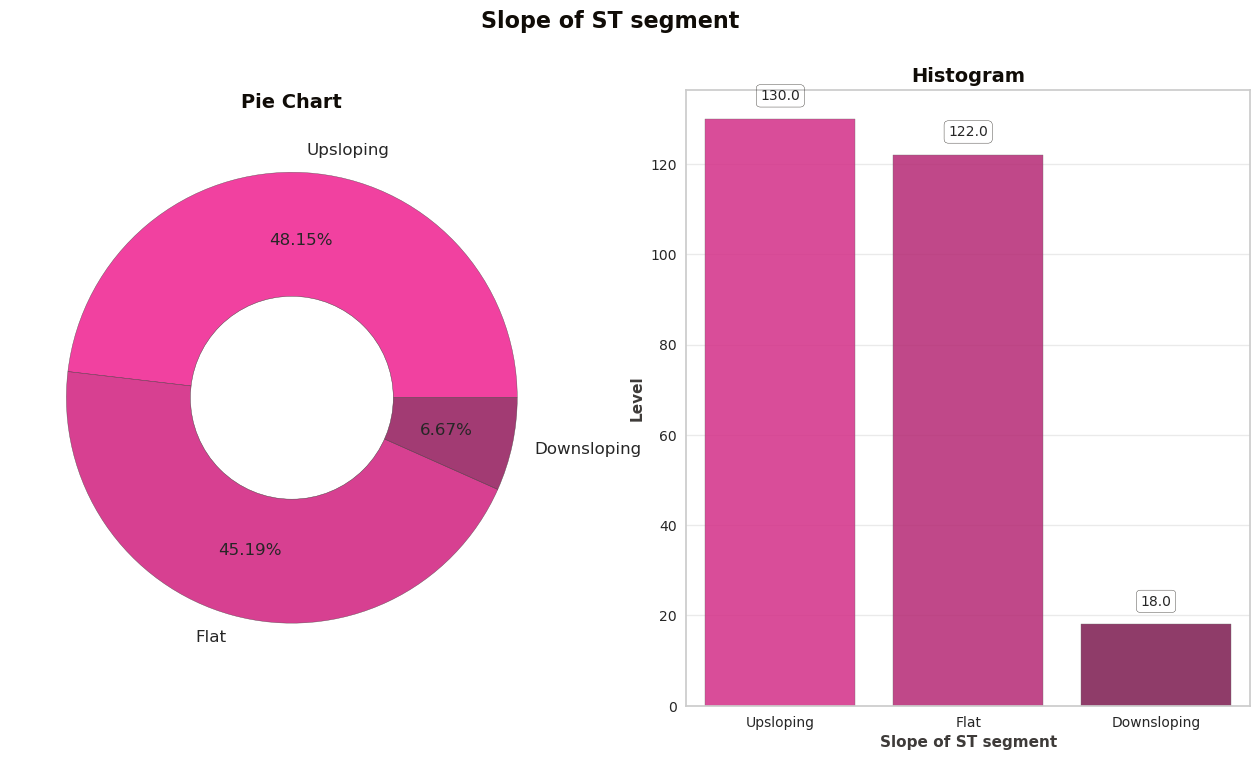

In [41]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['Upsloping', 'Flat', 'Downsloping']
order=df['Slope_of_ST'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of ST segment', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Slope_of_ST'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Slope_of_ST', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Slope of ST segment', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Slope of ST segment ::'+'\033[1m')
print('*' * 30)
df.Slope_of_ST.value_counts(dropna=False)

**************************************************
:: Number of Major Vessels ::
**************************************************


0    160
1     58
2     33
3     19
Name: Number_of_vessels_fluro, dtype: int64

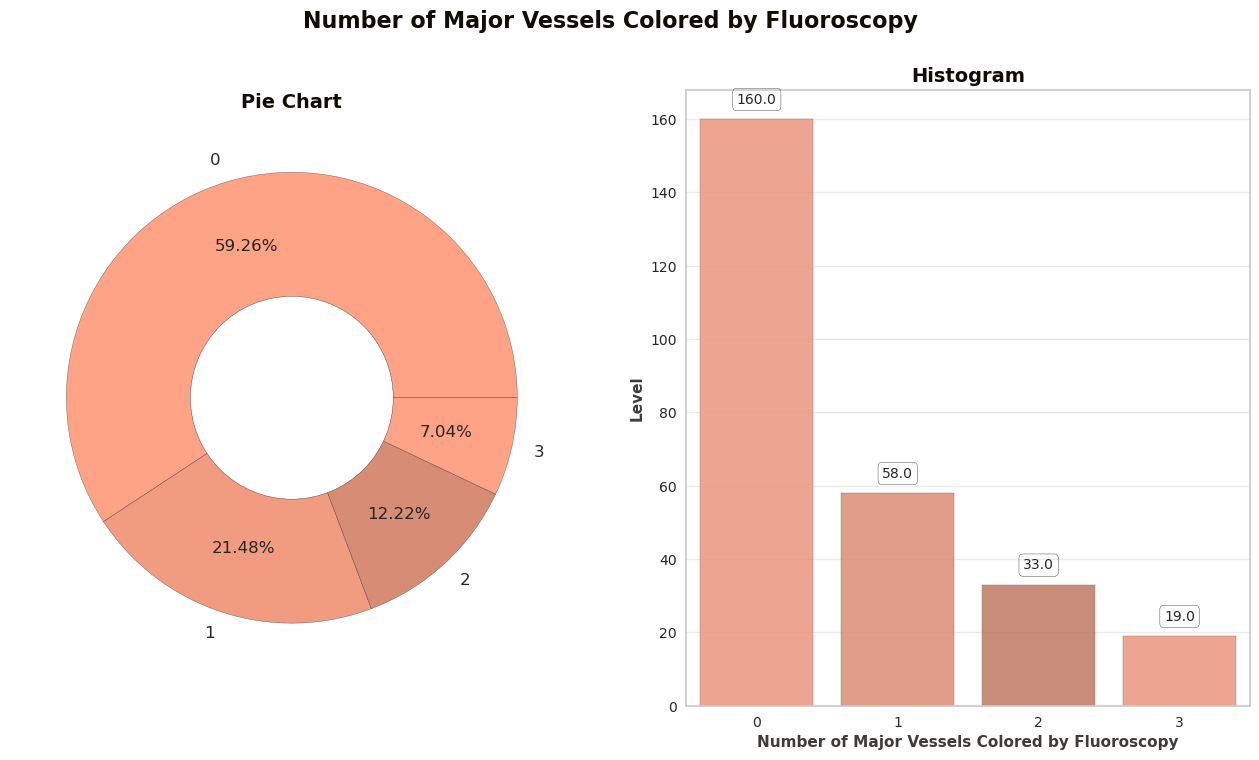

In [42]:
# --- Setting Colors, Labels, Order ---
colors=brown_grad[1:4]
labels=['0', '1', '2', '3']
order=df['Number_of_vessels_fluro'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Colored by Fluoroscopy', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Number_of_vessels_fluro'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Number_of_vessels_fluro', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Number of Major Vessels Colored by Fluoroscopy', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+':: Number of Major Vessels ::'+'\033[1m')
print('*' * 50)
df.Number_of_vessels_fluro.value_counts(dropna=False)

******************************
:: Thallium Stress Test ::
******************************


3    152
7    104
6     14
Name: Thallium, dtype: int64

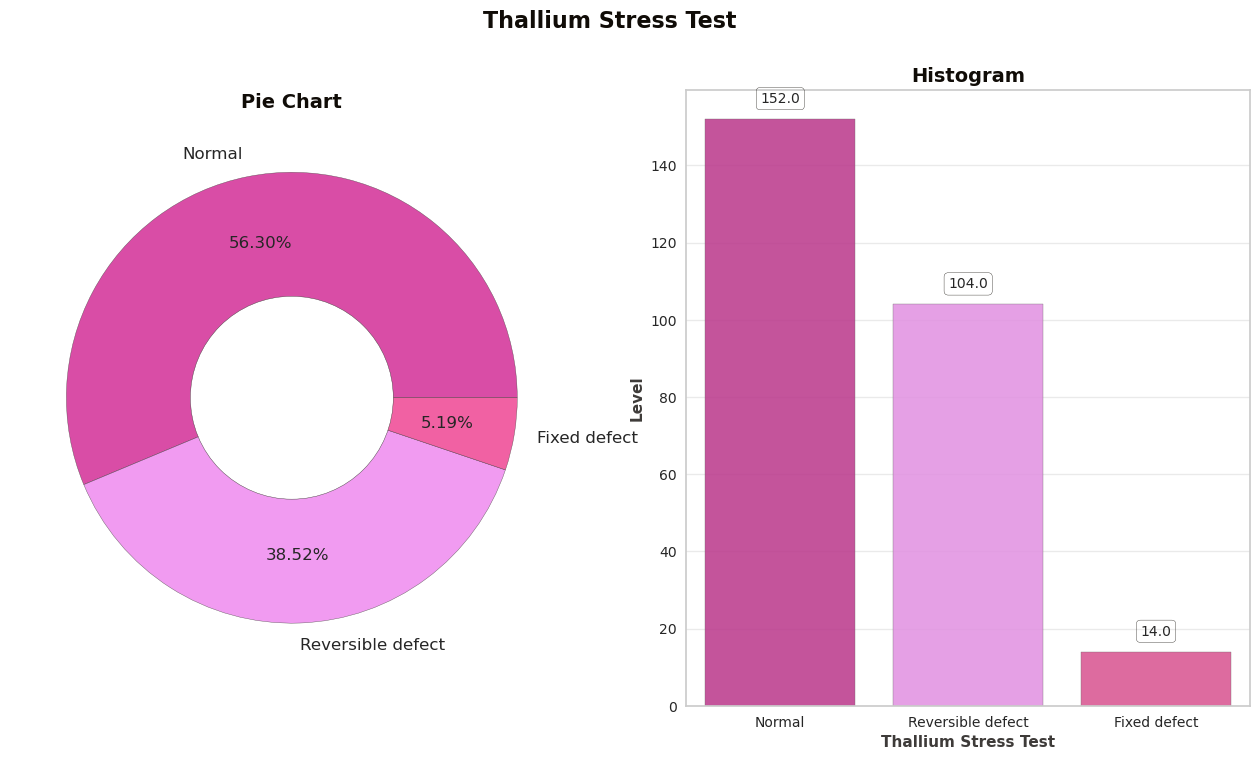

In [43]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[1:4]
labels=['Normal', 'Reversible defect', 'Fixed defect']
order=df['Thallium'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Thallium Stress Test', fontweight='heavy', 
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Thallium'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Thallium', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Thallium Stress Test', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+':: Thallium Stress Test ::'+'\033[1m')
print('*' * 30)
df.Thallium.value_counts(dropna=False)

In [44]:
df.Heart_Disease[df.Heart_Disease == 'Presence'] = 1 #Target condition present. Heart disease (0 = no/absence/false, 1= yes/presence/true)
df.Heart_Disease[df.Heart_Disease == 'Absence'] = 0  #Target condition is absent
df['Heart_Disease']=df['Heart_Disease'].astype(int)

In [45]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
BP,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
Max_HR,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
ST_depression,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000
Heart_Disease,270.000000,0.444444,0.497827,0.000000,0.000000,0.000000,1.000000,1.000000


.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.164
Kurtosis: -0.545




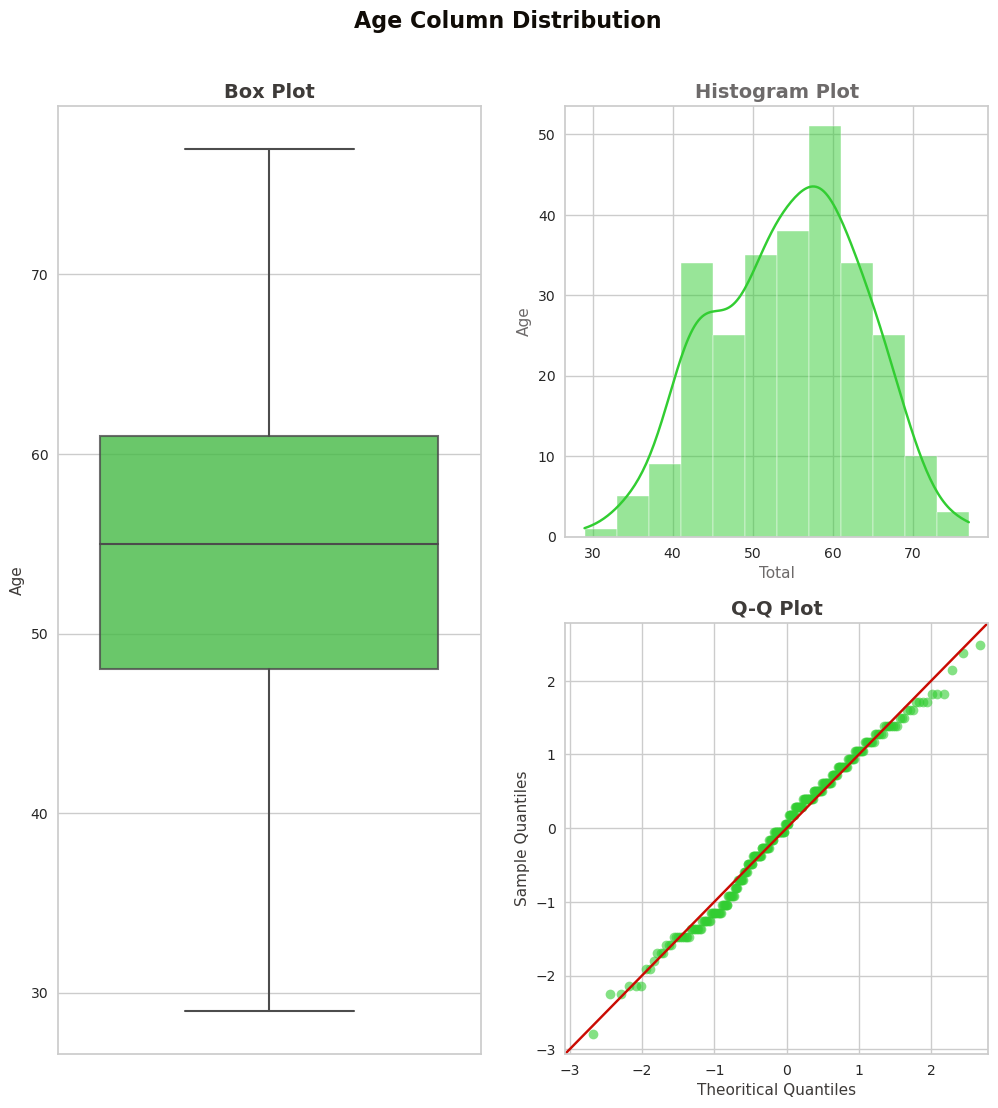

In [46]:
# --- Variable, Color & Plot Size ---
var = 'Age'
color = green_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[2])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[2])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[2])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

plt.show()

.: Blood Pressure Skewness & Kurtosis :.
****************************************
Skewness: 0.723
Kurtosis: 0.923




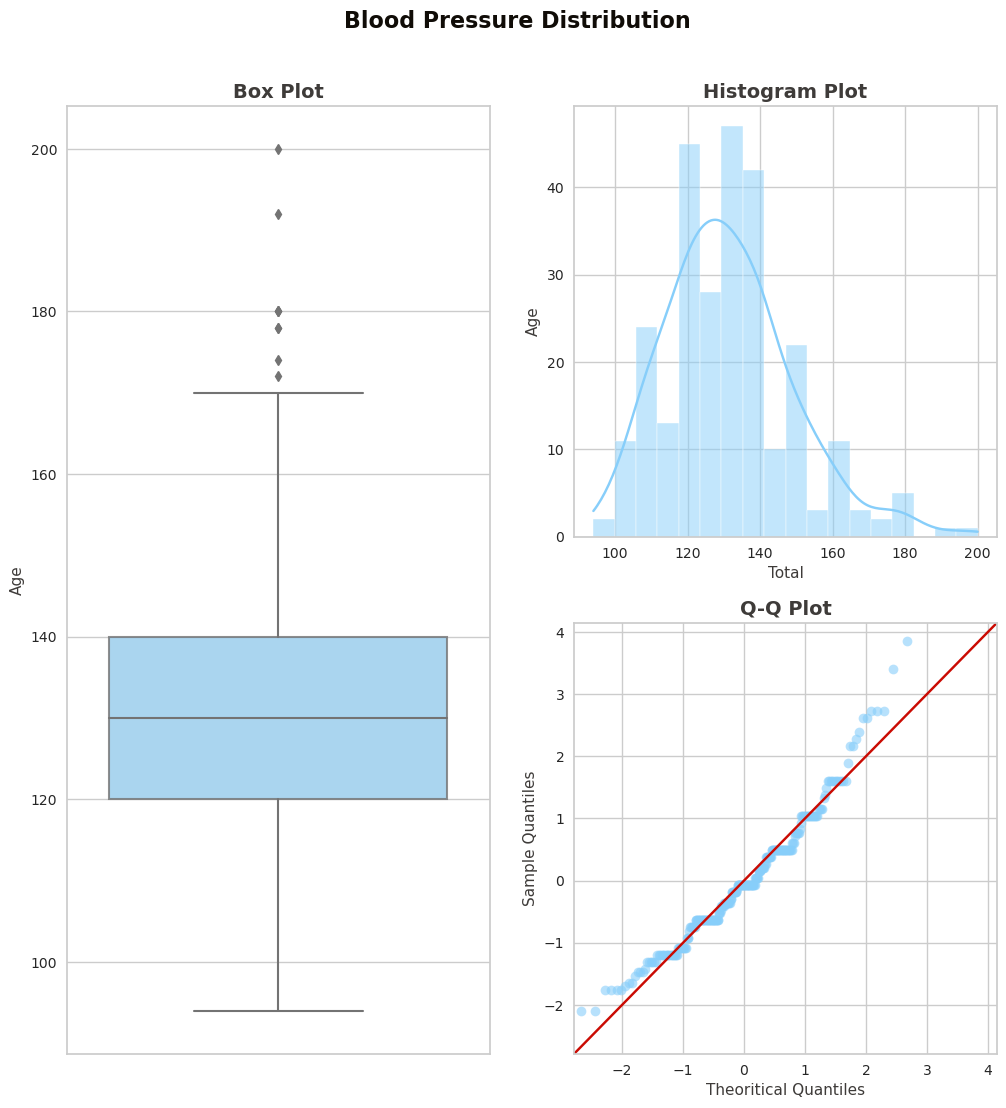

In [47]:
# --- Variable, Color & Plot Size ---
var = 'BP'
color = blue_grad[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Blood Pressure Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Blood Pressure Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

plt.show()

.: Cholesterol Skewness & Kurtosis :.
****************************************
Skewness: 1.184
Kurtosis: 4.896




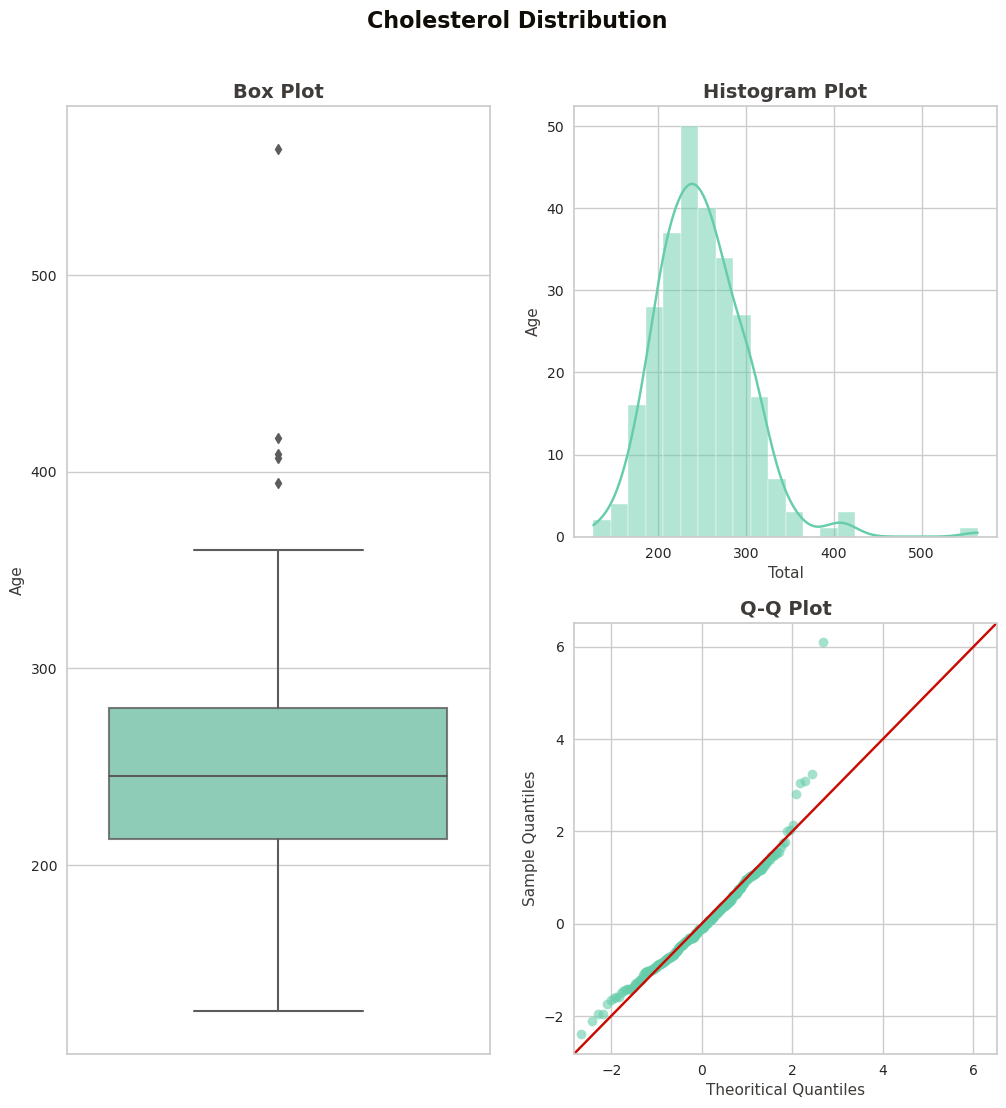

In [48]:
# --- Variable, Color & Plot Size ---
var = 'Cholesterol'
color = cyan_grad[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Cholesterol Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Cholesterol Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

plt.show()

.: Max. Heart Rate Skewness & Kurtosis :.
****************************************
Skewness: -0.528
Kurtosis: -0.103




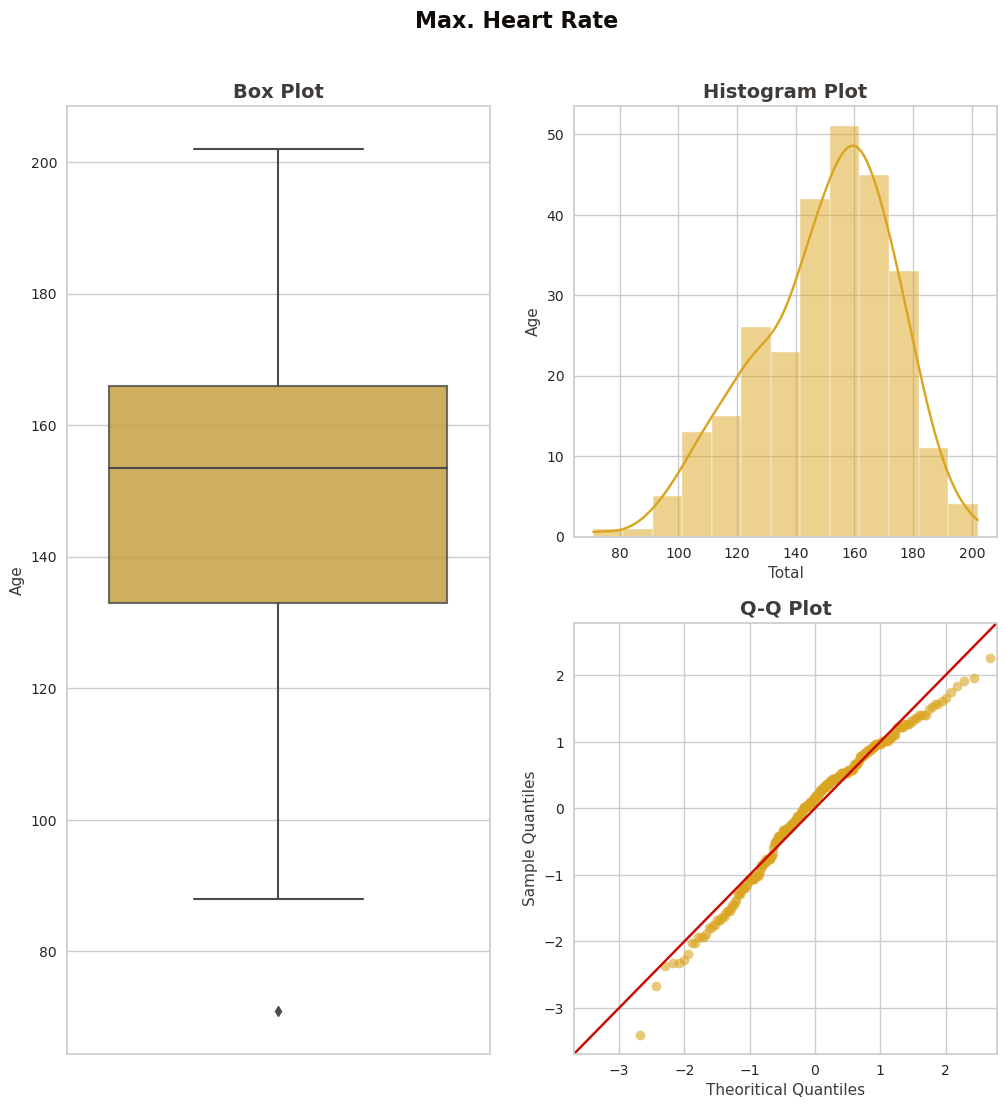

In [49]:
# --- Variable, Color & Plot Size ---
var = 'Max_HR'
color = gold_grad[3]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Max. Heart Rate Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Max. Heart Rate', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

plt.show()

.: Exercise induced ST depression Skewness & Kurtosis :.
****************************************
Skewness: 1.263
Kurtosis: 1.759




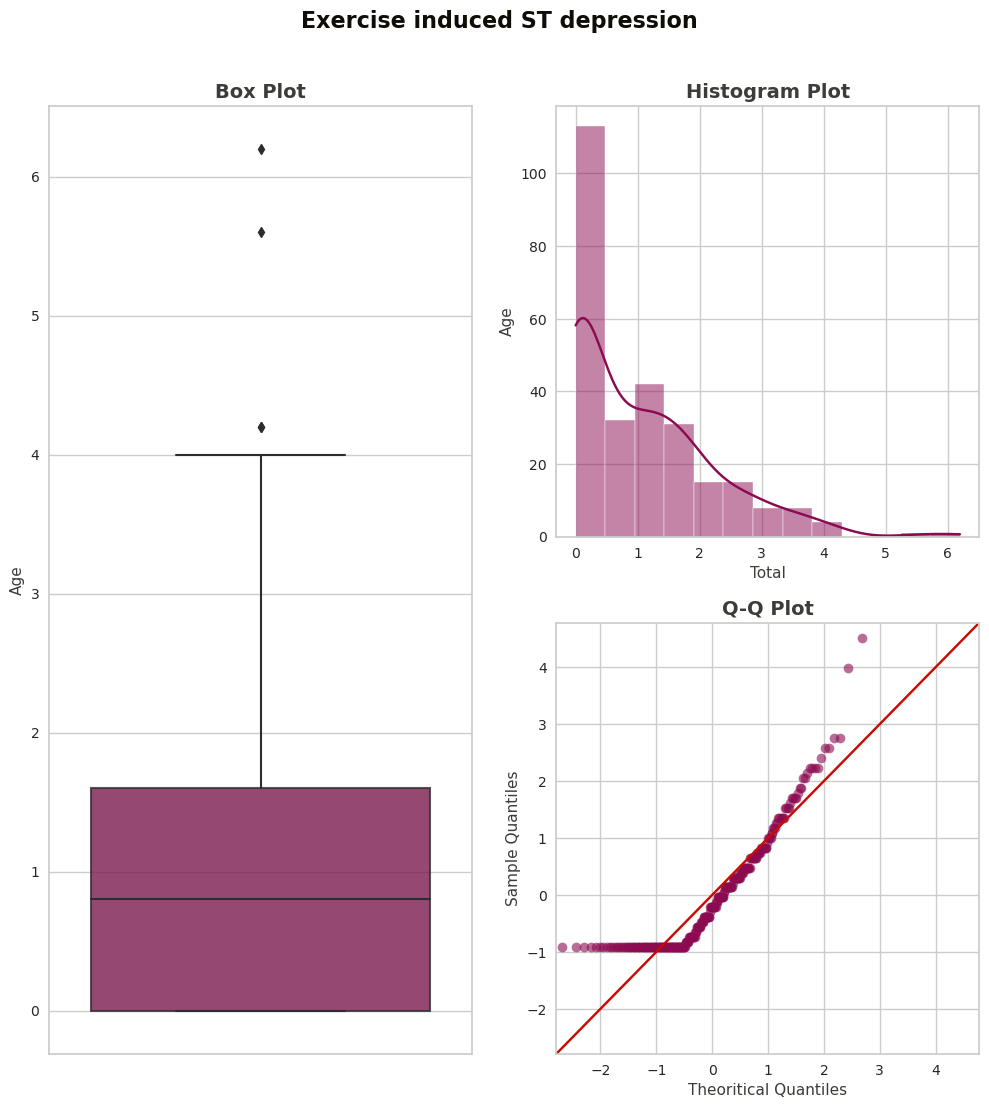

In [50]:
# --- Variable, Color & Plot Size ---
var = 'ST_depression'
color = pink_grad[3]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Exercise induced ST depression Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Exercise induced ST depression', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color=black_grad[1])

plt.show()

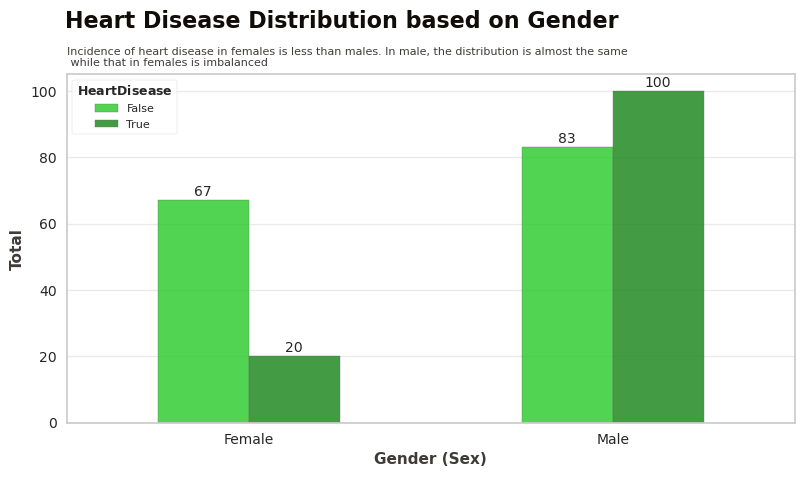

In [51]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.Sex, df.Heart_Disease).plot(kind='bar', figsize=(8, 5), 
                                         color=green_grad[1:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='times new roman', 
             color=black_grad[0])
plt.title('Incidence of heart disease in females is less than males. In male, the distribution is almost the same\n while that in females is imbalanced', 
          fontsize='8', fontfamily='times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='times new roman', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='times new roman', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Heart Disease}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

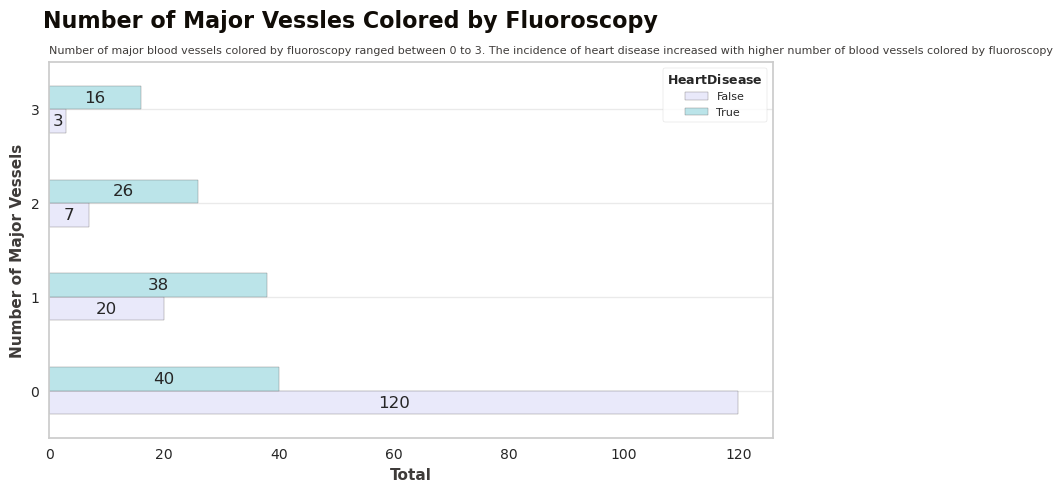

In [52]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.Number_of_vessels_fluro, df.Heart_Disease).plot(kind='barh', figsize=(8, 5), 
                                         color=blue_grad[1:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Number of Major Vessles Colored by Fluoroscopy', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='times new roman', 
             color=black_grad[0])
plt.title('Number of major blood vessels colored by fluoroscopy ranged between 0 to 3. The incidence of heart disease increased with higher number of blood vessels colored by fluoroscopy', 
          fontsize='8', fontfamily='times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='times new roman', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='times new roman', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Heart Disease}$', fontsize='8', 
           title_fontsize='9', loc='upper right', frameon=True);

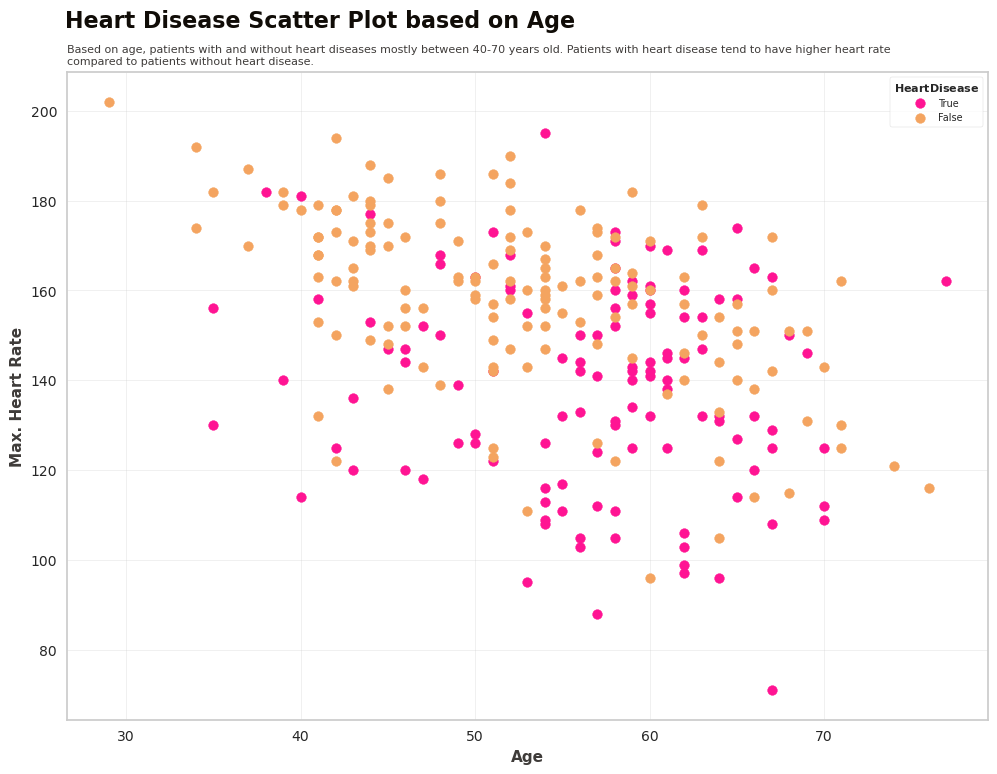

In [53]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='times new roman', 
             color=black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 40-70 years old. Patients with heart disease tend to have higher heart rate\ncompared to patients without heart disease.', 
          fontsize='8', fontfamily='times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.Age[(df.Heart_Disease==1)], y=df.Max_HR[(df.Heart_Disease==1)], c=pink_grad[0])
plt.scatter(x=df.Age[(df.Heart_Disease==0)], y=df.Max_HR[(df.Heart_Disease==0)], c=brown_grad[4])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['True', 'False'], title='$\\bf{Heart Disease}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='times new roman', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)

plt.show();

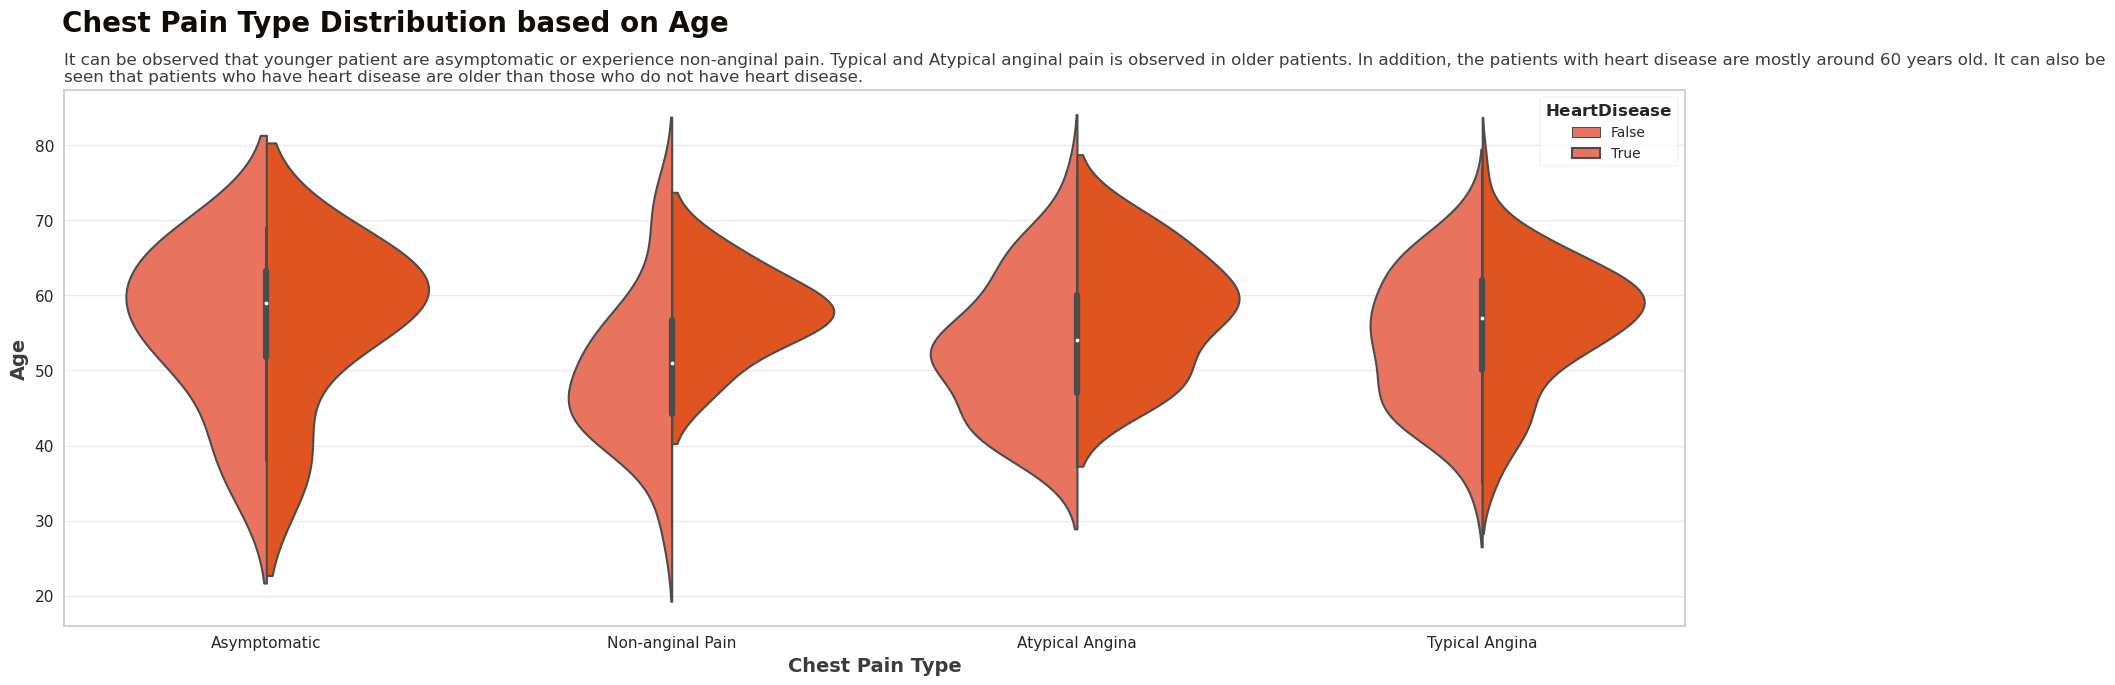

In [54]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='Times new roman', 
             color=black_grad[0])
plt.title('It can be observed that younger patient are asymptomatic or experience non-anginal pain. Typical and Atypical anginal pain is observed in older patients. In addition, the patients with heart disease are mostly around 60 years old. It can also be\nseen that patients who have heart disease are older than those who do not have heart disease.', 
          fontsize='12', fontfamily='Times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Violin Plot based on Type ---
sns.violinplot(x='Chest_pain_type', y='Age', hue='Heart_Disease', data=df, ax=ax, 
               palette=coral_grad[1:4], boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
plt.legend(['False', 'True'],title='$\\bf{Heart Disease}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
xs= [0,1,2,3]
labels=['Asymptomatic', 'Non-anginal Pain', 'Atypical Angina', 'Typical Angina']
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='Times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='Times new roman', 
           color=black_grad[1])
plt.xticks(xs,labels,fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

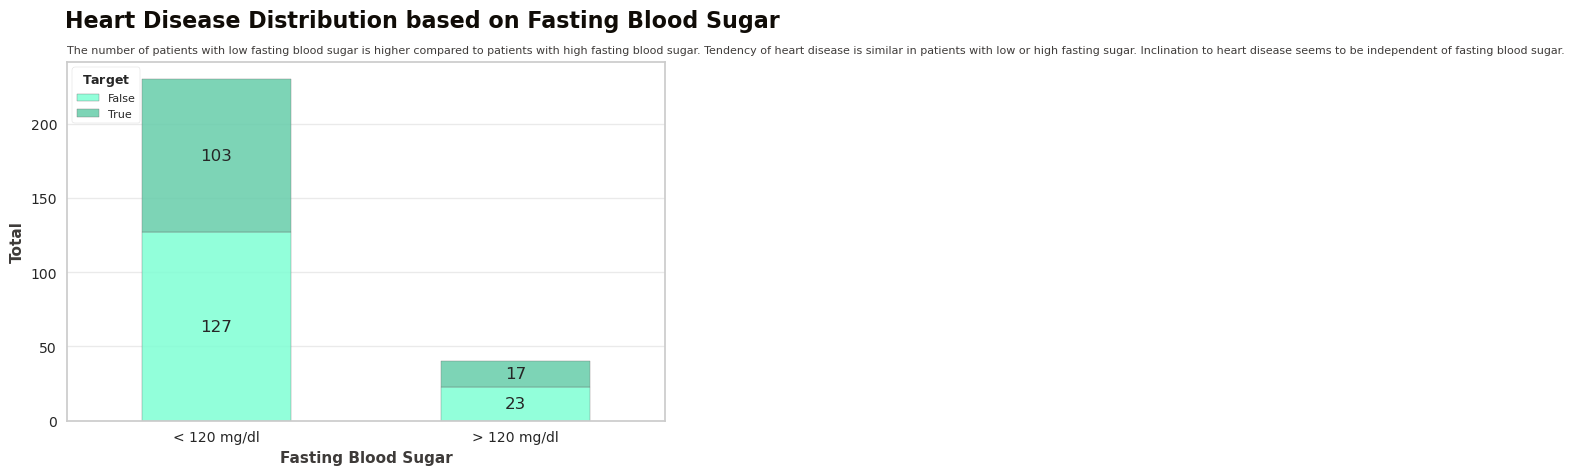

In [55]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.FBS_over_120, df.Heart_Disease).plot(kind='bar', figsize=(8, 5), 
                                         color=cyan_grad[1:4], stacked=True,
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='Times new roman', color=black_grad[0])
plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. Tendency of heart disease is similar in patients with low or high fasting sugar. Inclination to heart disease seems to be independent of fasting blood sugar.', 
          fontsize='8', fontfamily='Times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontfamily='Times new roman', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='Times new roman', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

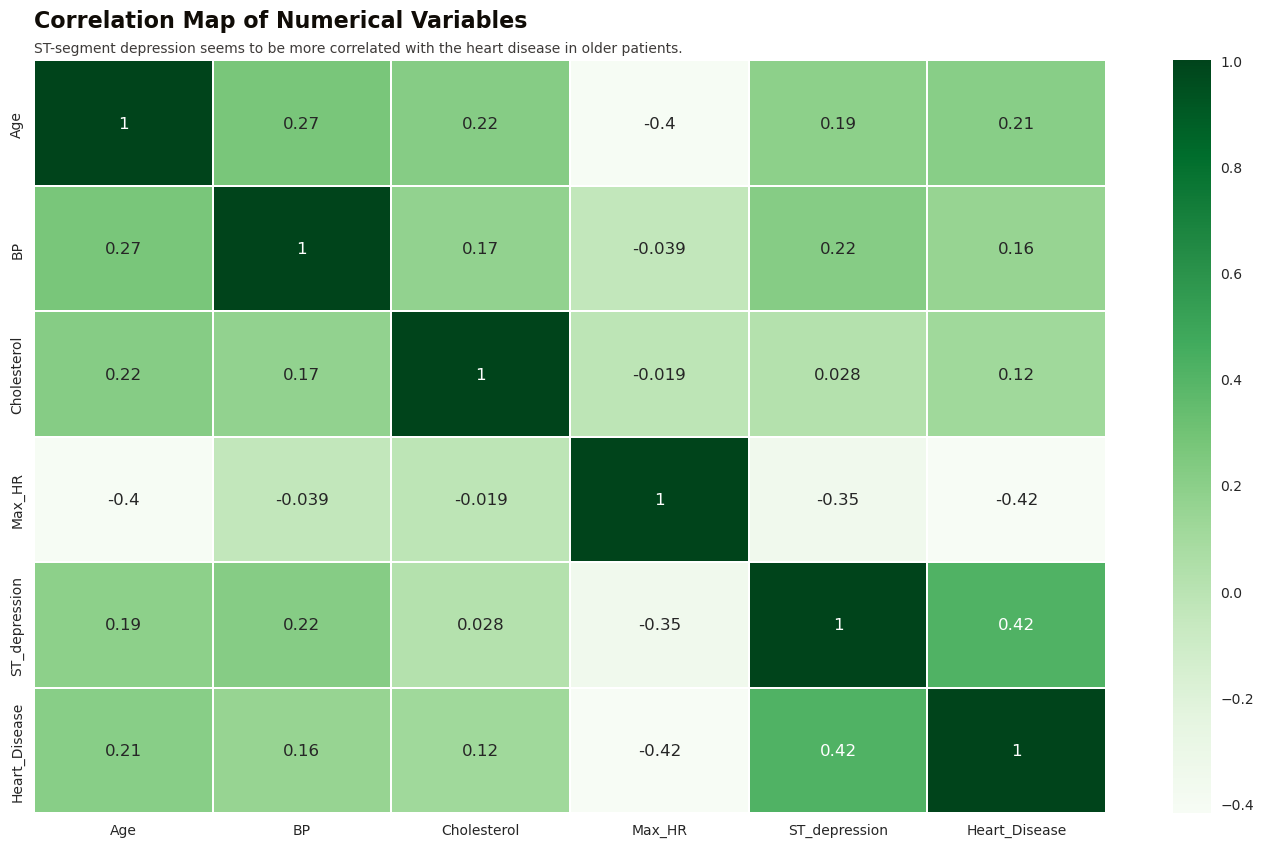

In [56]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='Times new roman', 
             color=black_grad[0])
plt.title('ST-segment depression seems to be more correlated with the heart disease in older patients.', 
          fontsize='10', fontfamily='Times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [57]:
# --- Creating Dummy Variables for Chest pain type, Thallium and Slope_of_ST ---
cp = pd.get_dummies(df['Chest_pain_type'], prefix='cp')
thal = pd.get_dummies(df['Thallium'], prefix='thal')
slope = pd.get_dummies(df['Slope_of_ST'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [58]:
# --- Display New Data Frame ---
df.head().style.hide_index().background_gradient(cmap='Pastel2').set_properties(**{'font-family': 'Times new roman'})

Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
70,1,4,130,322,0,2,109,0,2.400000,2,3,3,1,0,0,0,1,1,0,0,0,1,0
67,0,3,115,564,0,2,160,0,1.600000,2,0,7,0,0,0,1,0,0,0,1,0,1,0
57,1,2,124,261,0,0,141,0,0.300000,1,0,7,1,0,1,0,0,0,0,1,1,0,0
64,1,4,128,263,0,0,105,1,0.200000,2,1,7,0,0,0,0,1,0,0,1,0,1,0
74,0,2,120,269,0,2,121,1,0.200000,1,1,3,0,0,1,0,0,1,0,0,1,0,0


In [59]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['Chest_pain_type', 'Thallium', 'Slope_of_ST'])

In [60]:
# --- Display New Data Frame ---
df.head().style.hide_index().background_gradient(cmap='Pastel2').set_properties(**{'font-family': 'Times new roman'})

Age,Sex,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Number_of_vessels_fluro,Heart_Disease,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
70,1,130,322,0,2,109,0,2.400000,3,1,0,0,0,1,1,0,0,0,1,0
67,0,115,564,0,2,160,0,1.600000,0,0,0,0,1,0,0,0,1,0,1,0
57,1,124,261,0,0,141,0,0.300000,0,1,0,1,0,0,0,0,1,1,0,0
64,1,128,263,0,0,105,1,0.200000,1,0,0,0,0,1,0,0,1,0,1,0
74,0,120,269,0,2,121,1,0.200000,1,0,0,1,0,0,1,0,0,1,0,0


In [61]:
# --- Seperating Dependent Features ---
x = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']

In [62]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [63]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [64]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 75.93% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        26
           1       0.86      0.64      0.73        28

    accuracy                           0.76        54
   macro avg       0.78      0.76      0.76        54
weighted avg       0.78      0.76      0.76        54


.: Performance Evaluation
**************************


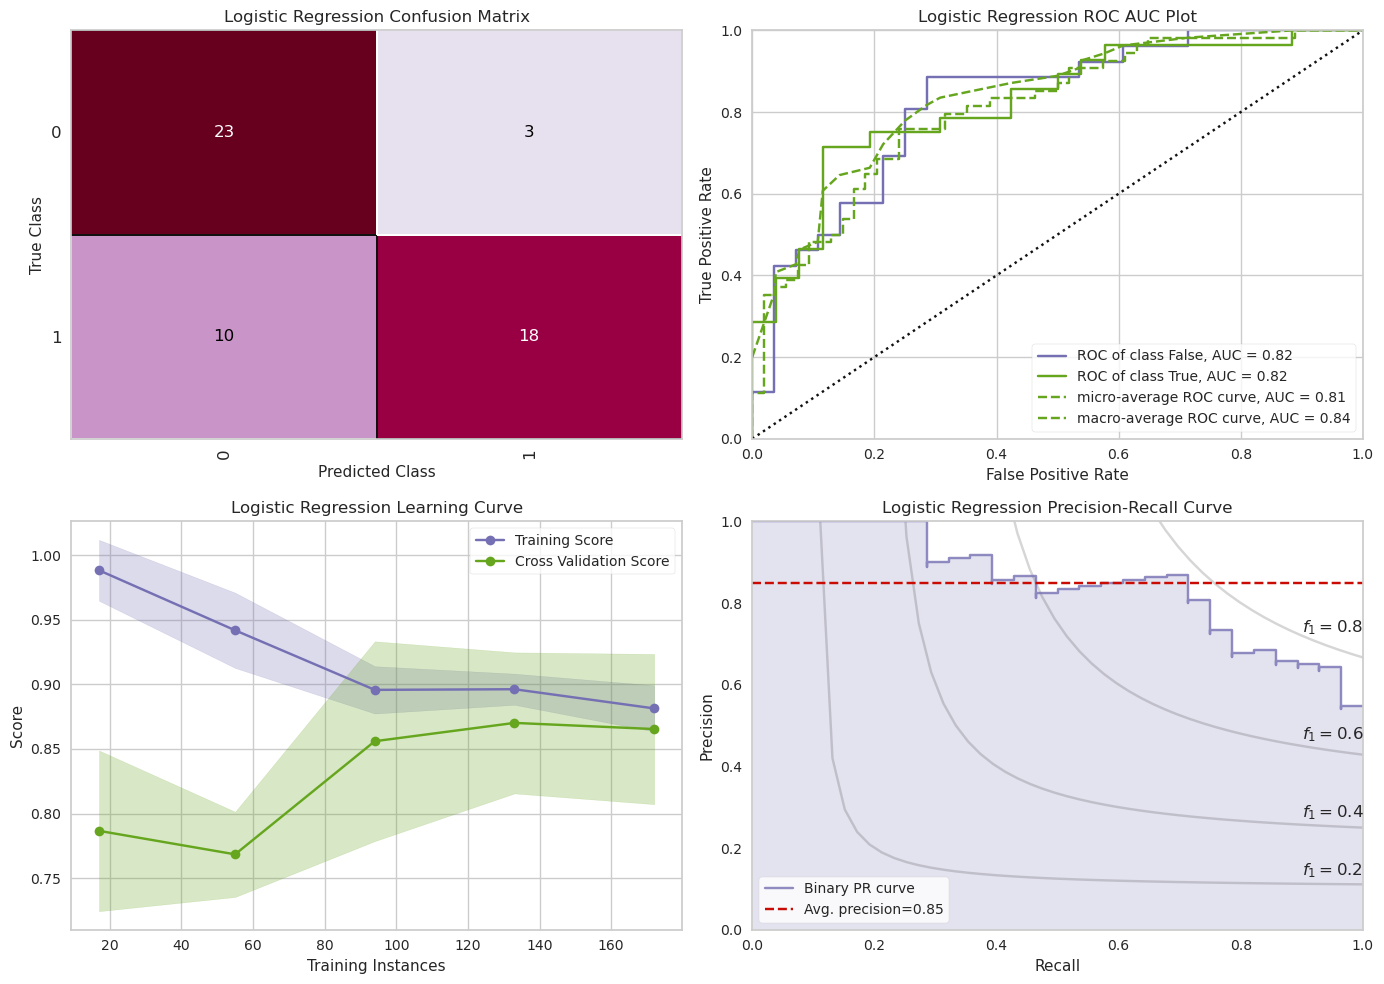

In [65]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

In [66]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 70.37% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.77      0.61      0.68        28

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.72      0.70      0.70        54


.: Performance Evaluation
**************************


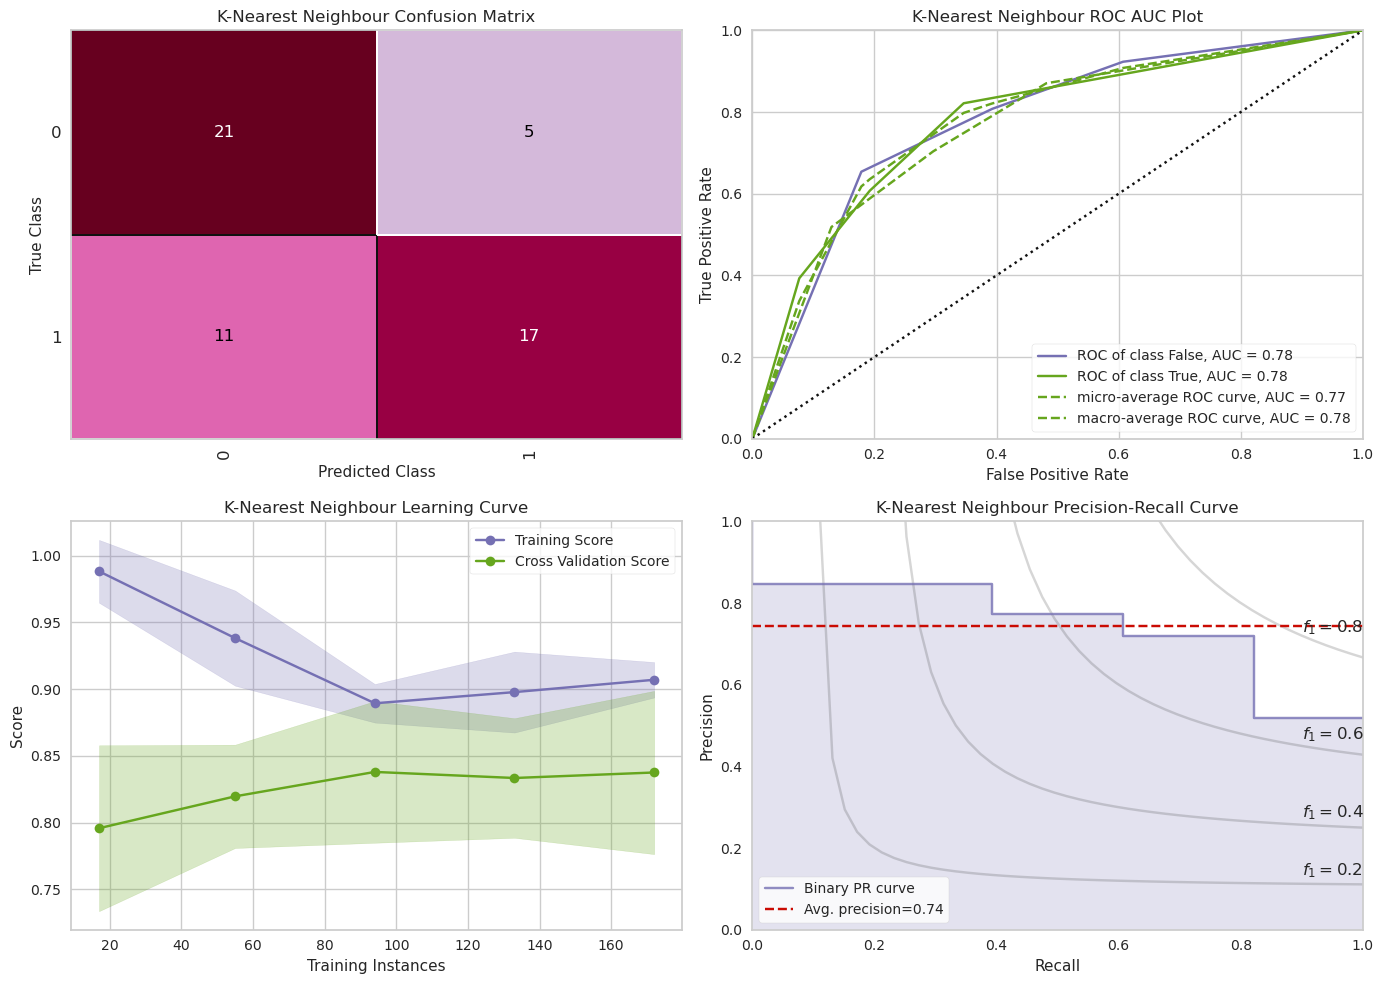

In [67]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

In [68]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 72.22% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        26
           1       0.88      0.54      0.67        28

    accuracy                           0.72        54
   macro avg       0.77      0.73      0.71        54
weighted avg       0.77      0.72      0.71        54


.: Performance Evaluation
**************************


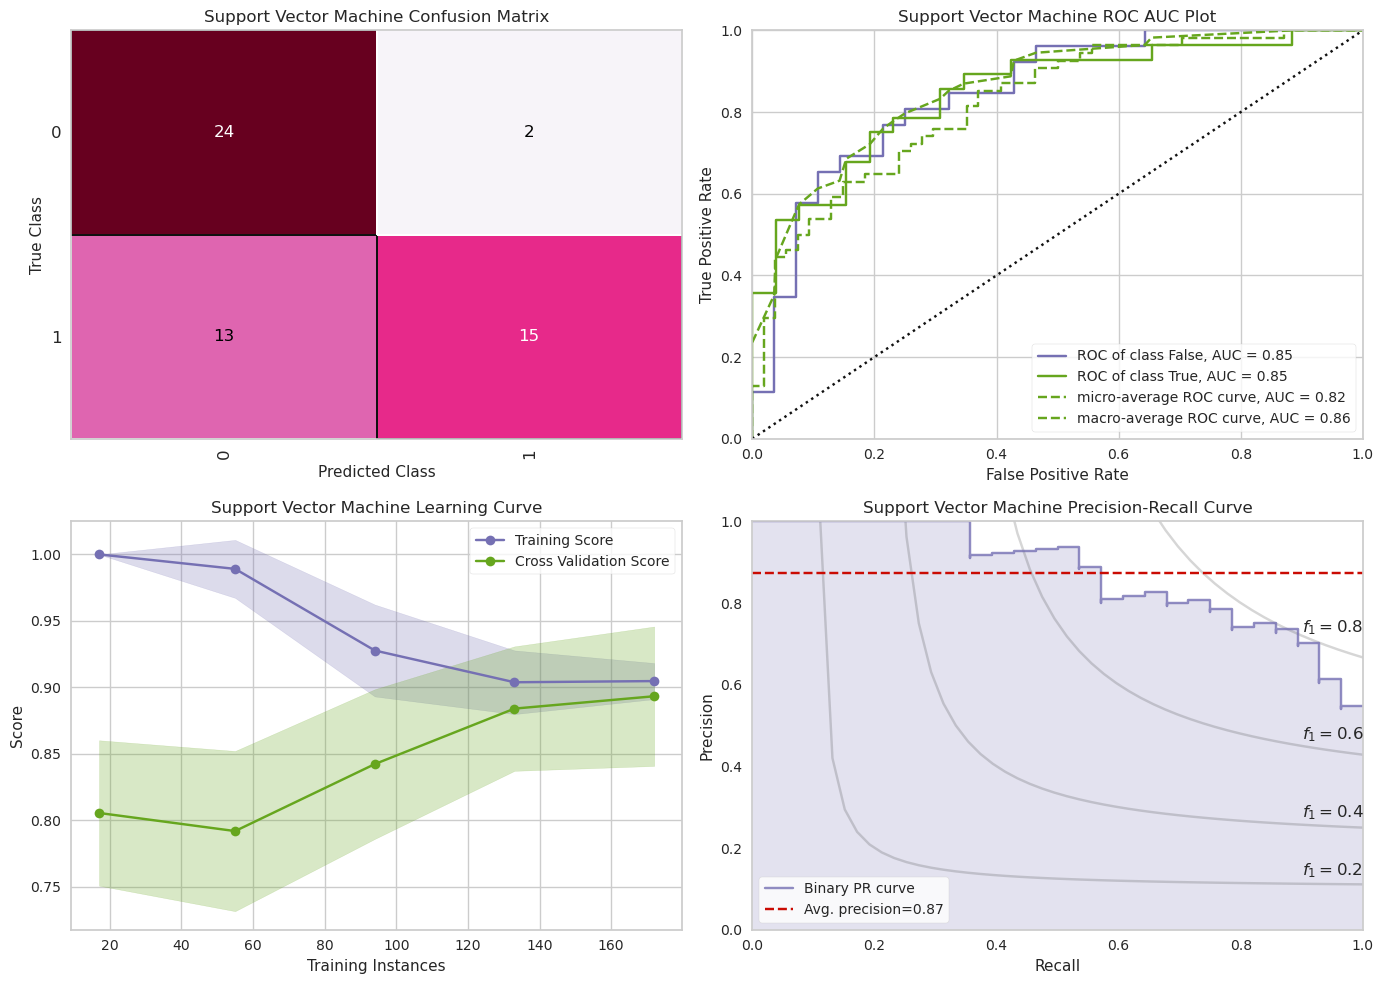

In [69]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();


In [70]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

.:. Gaussian Naive Bayes Accuracy: 74.07% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.82      0.64      0.72        28

    accuracy                           0.74        54
   macro avg       0.75      0.74      0.74        54
weighted avg       0.76      0.74      0.74        54


.: Performance Evaluation
**************************


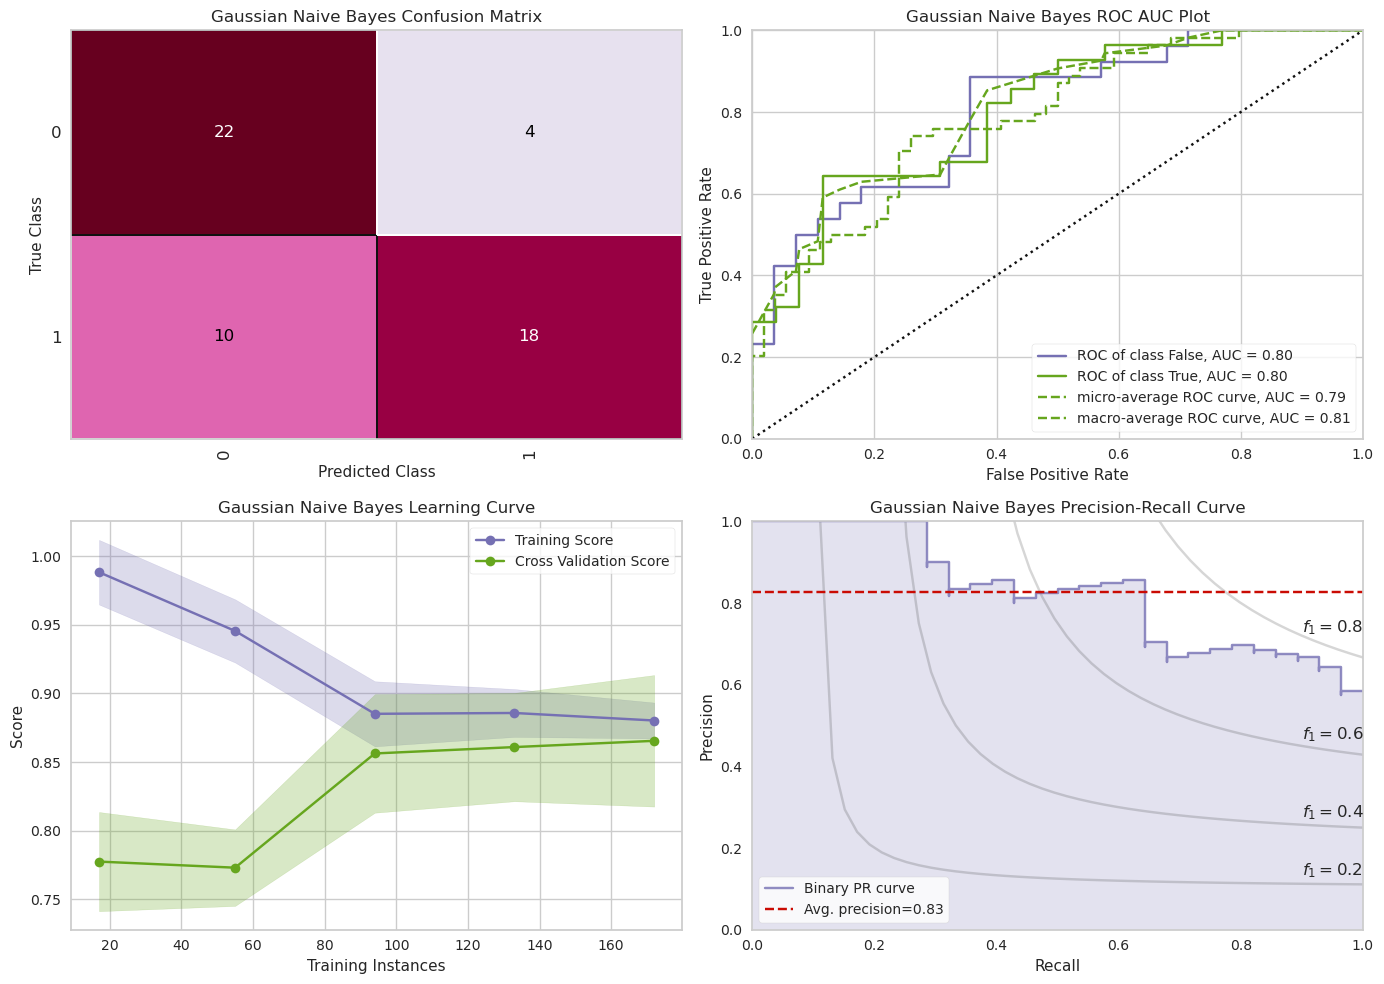

In [71]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(x_train, y_train)
gnbrocauc.score(x_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(x_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(x_train, y_train)
gnbcurve.score(x_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

In [72]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 68.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        26
           1       0.76      0.57      0.65        28

    accuracy                           0.69        54
   macro avg       0.70      0.69      0.68        54
weighted avg       0.70      0.69      0.68        54


.: Performance Evaluation
**************************


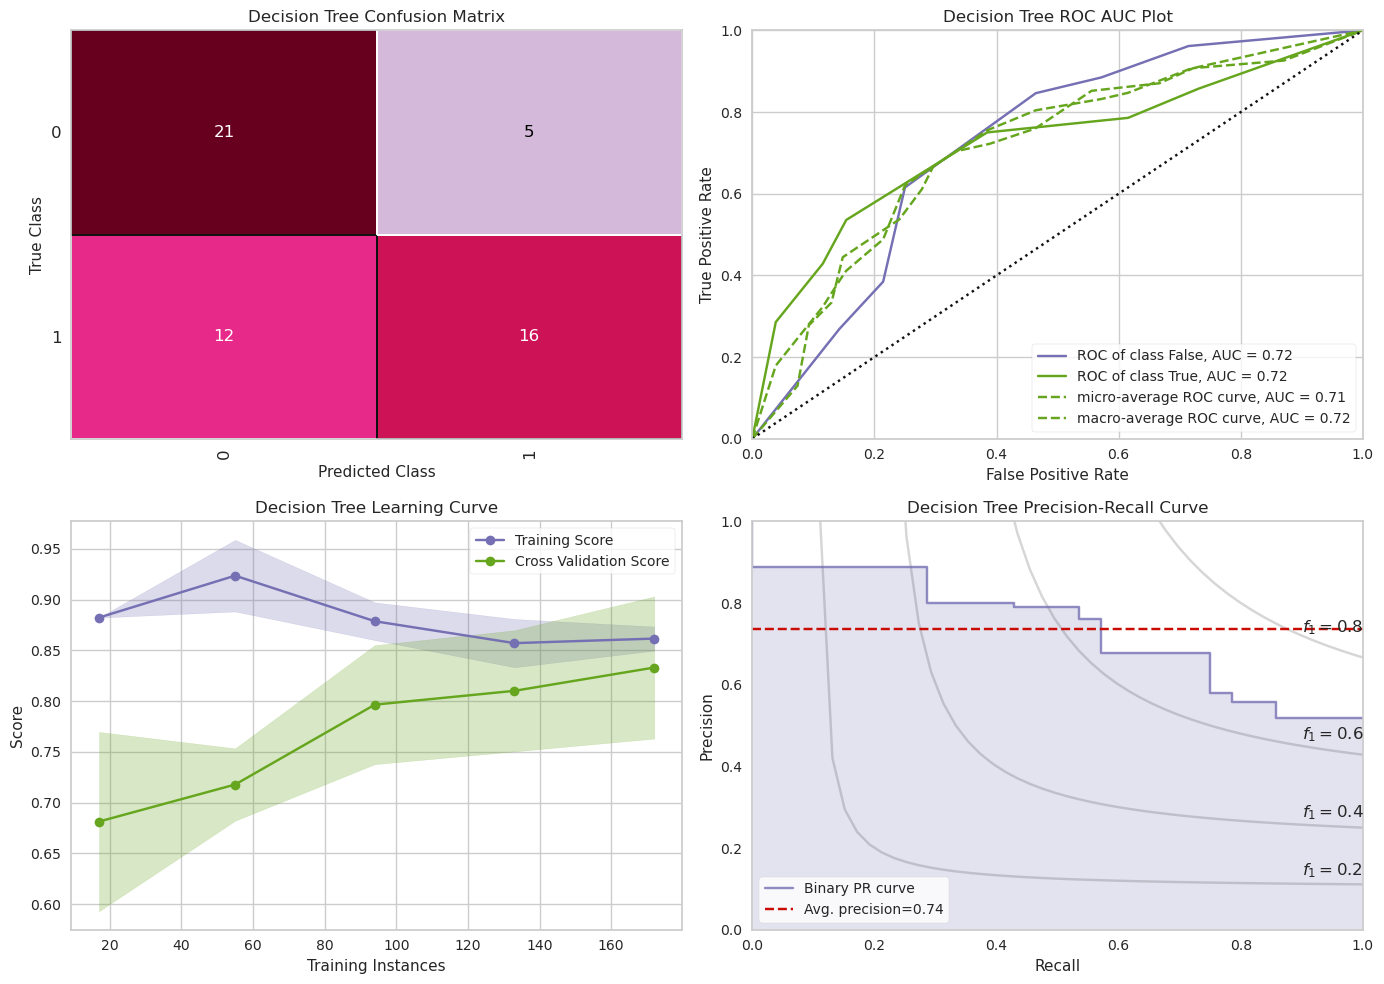

In [73]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

In [74]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 68.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        26
           1       0.79      0.54      0.64        28

    accuracy                           0.69        54
   macro avg       0.71      0.69      0.68        54
weighted avg       0.71      0.69      0.68        54


.: Performance Evaluation
**************************


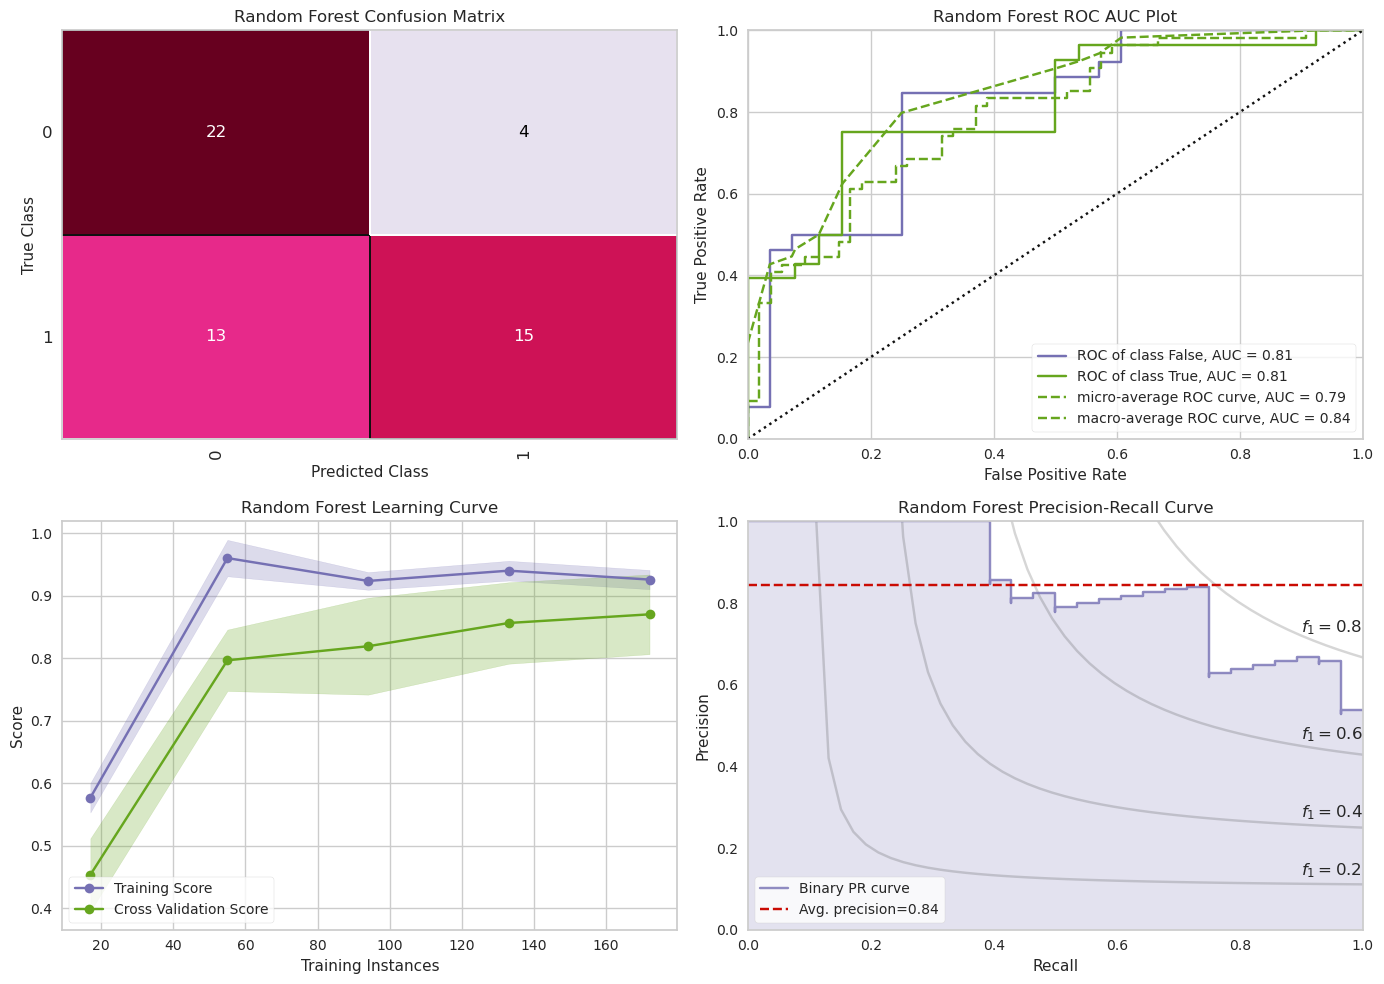

In [75]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();


In [76]:
# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(x_train, y_train)
y_pred_ET = ETclassifier.predict(x_test)

.:. Extra Tree Classifier Accuracy: 68.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        26
           1       0.76      0.57      0.65        28

    accuracy                           0.69        54
   macro avg       0.70      0.69      0.68        54
weighted avg       0.70      0.69      0.68        54


.: Performance Evaluation
**************************


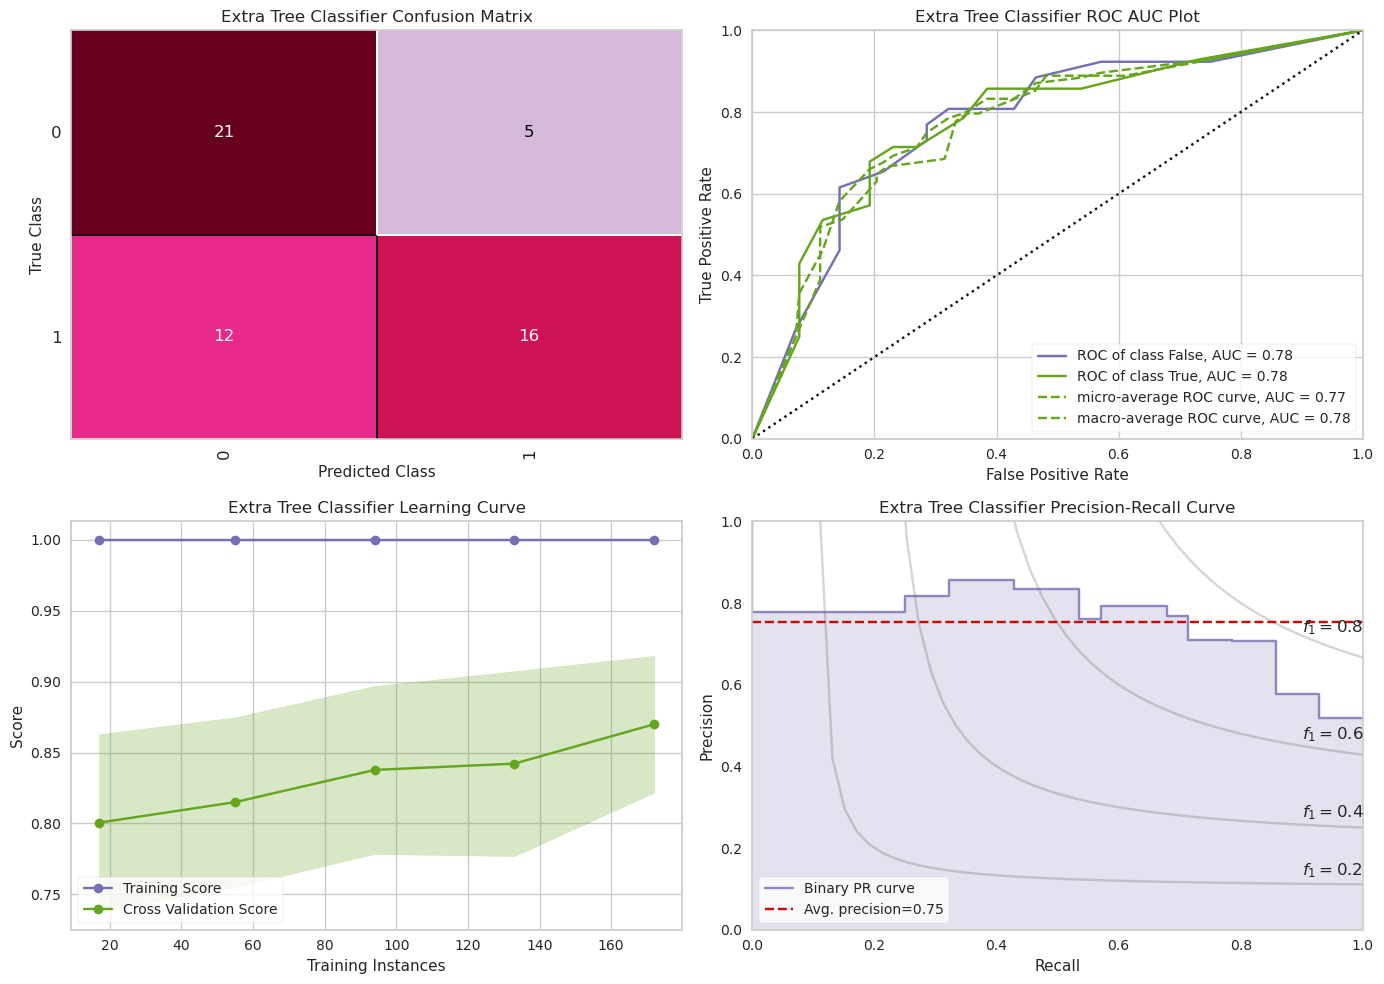

In [77]:
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- ET Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_ET))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- ET Confusion Matrix ---
etcmatrix = ConfusionMatrix(ETclassifier, ax=ax1, cmap='PuRd',
                            title='Extra Tree Classifier Confusion Matrix')
etcmatrix.fit(x_train, y_train)
etcmatrix.score(x_test, y_test)
etcmatrix.finalize()

# --- ET ROC AUC ---
etrocauc = ROCAUC(ETclassifier, classes=['False', 'True'], ax=ax2,
                  title='Extra Tree Classifier ROC AUC Plot')
etrocauc.fit(x_train, y_train)
etrocauc.score(x_test, y_test)
etrocauc.finalize()

# --- ET Learning Curve ---
etlc = LearningCurve(ETclassifier, ax=ax3, title='Extra Tree Classifier Learning Curve')
etlc.fit(x_train, y_train)
etlc.finalize()

# --- ET Precision Recall Curve ---
etpc = PrecisionRecallCurve(ETclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='Extra Tree Classifier Precision-Recall Curve')
etpc.fit(x_train, y_train)
etpc.score(x_test, y_test)
etpc.finalize()

plt.tight_layout();


In [78]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

.:. Gradient Boosting Accuracy: 68.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        26
           1       0.76      0.57      0.65        28

    accuracy                           0.69        54
   macro avg       0.70      0.69      0.68        54
weighted avg       0.70      0.69      0.68        54


.: Performance Evaluation
**************************


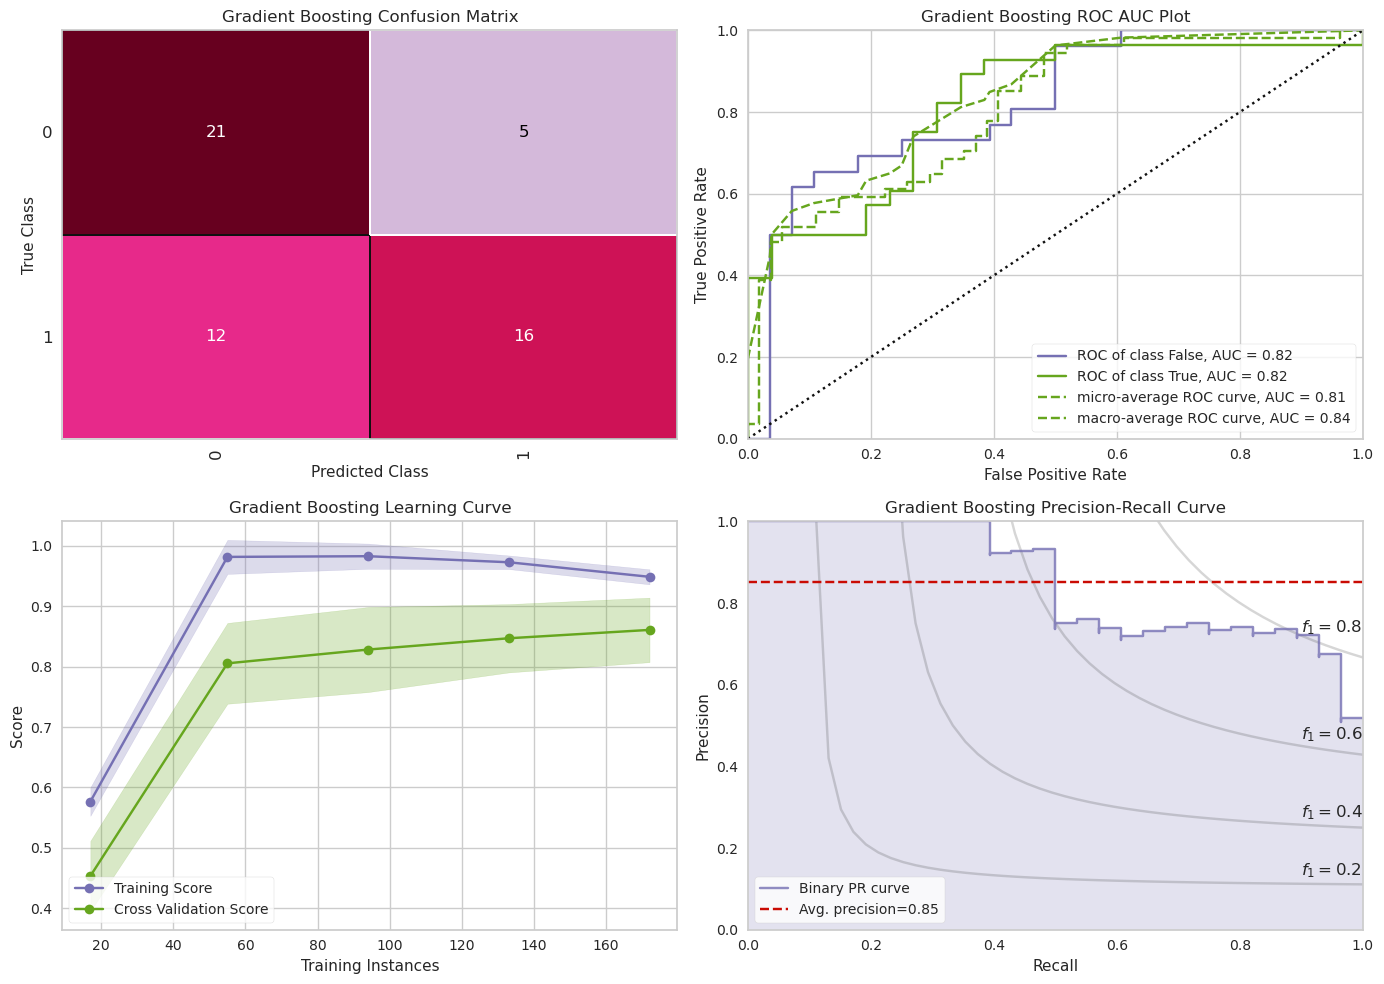

In [79]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

In [80]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)

.:. AdaBoost Accuracy: 75.93% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       0.83      0.68      0.75        28

    accuracy                           0.76        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54


.: Performance Evaluation
**************************


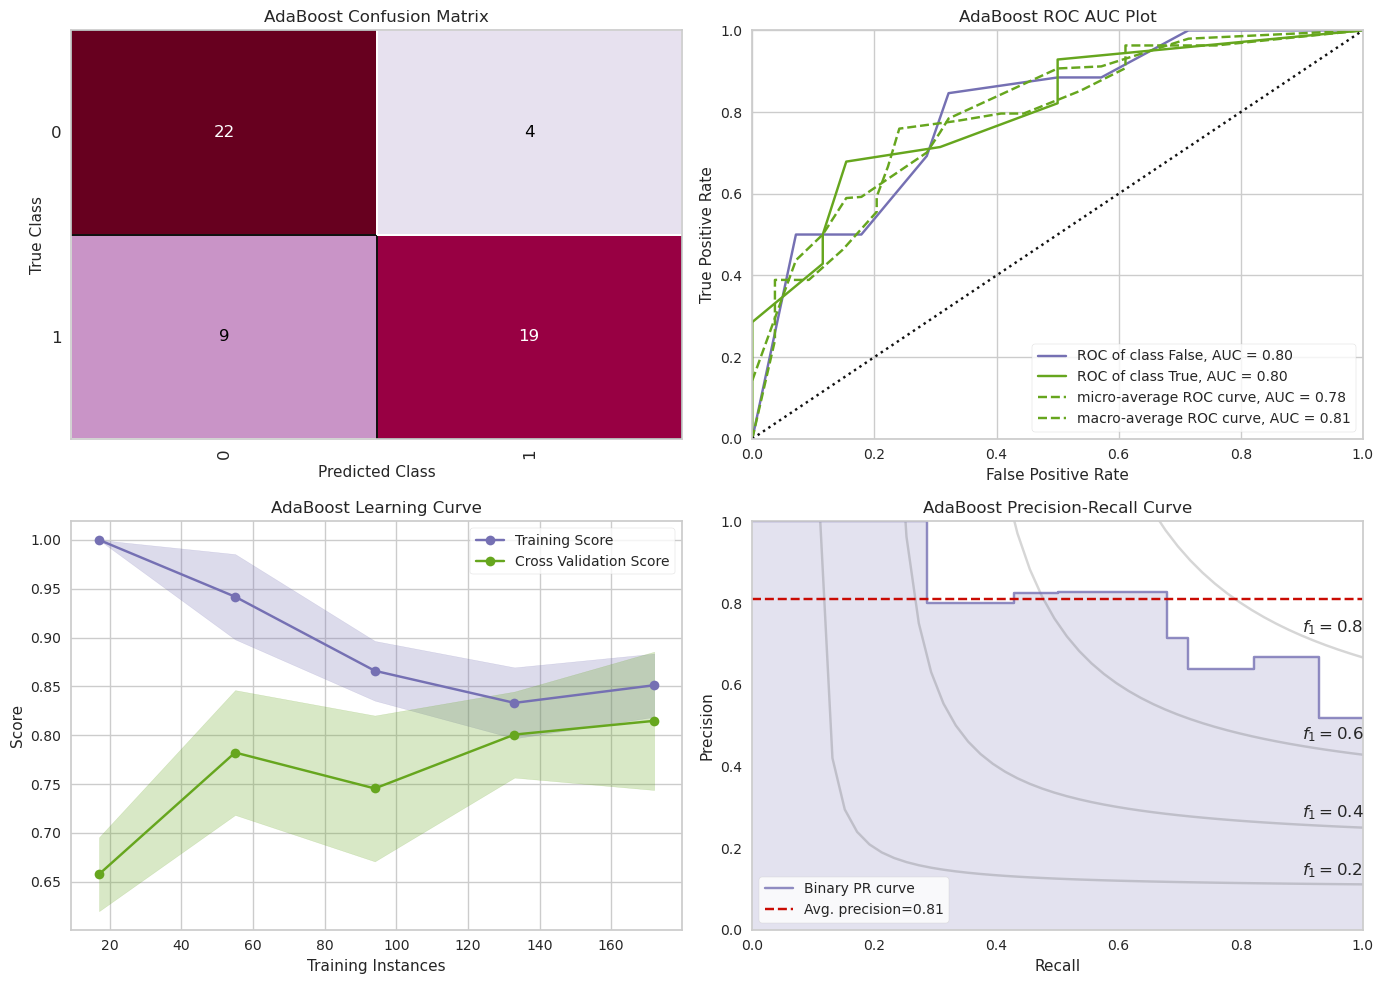

In [81]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(x_train, y_train)
abrocauc.score(x_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(x_train, y_train)
abpc.score(x_test, y_test)
abpc.finalize()

plt.tight_layout();

In [82]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

Model,Accuracy
Logistic Regression,75.925926
AdaBoost,75.925926
Gaussian Naive Bayes,74.074074
Support Vector Machine,72.222222
K-Nearest Neighbour,70.370370
Decision Tree,68.518519
Random Forest,68.518519
Gradient Boosting,68.518519
Extra Tree Classifier,68.518519


In [83]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'FBS_over_120', 'EKG_results',
       'Max_HR', 'Exercise_angina', 'ST_depression', 'Number_of_vessels_fluro',
       'Heart_Disease', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'thal_3', 'thal_6',
       'thal_7', 'slope_1', 'slope_2', 'slope_3'],
      dtype='object')

In [84]:
df.shape

(270, 21)

In [85]:
# --- Transform Test Set & Prediction into New Data Frame ---
test = pd.DataFrame(x_test, columns=['Age', 'Sex', 'BP', 'Cholesterol', 'FBS_over_120', 'EKG_results',
       'Max_HR', 'Exercise_angina', 'ST_depression', 'Number_of_vessels_fluro', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'thal_3', 'thal_6',
       'thal_7', 'slope_1', 'slope_2', 'slope_3'])
pred = pd.DataFrame(y_pred_LR, columns=['Heart_Disease'])
prediction = pd.concat([test, pred], axis=1, join='inner')

# --- Transforming 'cp' Column ---
prediction['cp_1'] = prediction['cp_1'].replace([1, 0],['0',''])
prediction['cp_2'] = prediction['cp_2'].replace([1, 0],['1', ''])
prediction['cp_3'] = prediction['cp_3'].replace([1, 0],['2', ''])
prediction['cp_4'] = prediction['cp_4'].replace([1, 0],['3', ''])

prediction['cp_1'] = np.where((prediction['cp_1'] == ''), prediction['cp_2'], prediction['cp_1'])
prediction['cp_1'] = np.where((prediction['cp_1'] == ''), prediction['cp_3'], prediction['cp_1'])
prediction['cp_1'] = np.where((prediction['cp_1'] == ''), prediction['cp_4'], prediction['cp_1'])

# --- Transforming 'thal' Column ---
prediction['thal_3'] = prediction['thal_3'].replace([1, 0],['0',''])
prediction['thal_6'] = prediction['thal_6'].replace([1, 0],['1', ''])
prediction['thal_7'] = prediction['thal_7'].replace([1, 0],['2', ''])


prediction['thal_3'] = np.where((prediction['thal_3'] == ''), prediction['thal_3'], prediction['thal_3'])
prediction['thal_3'] = np.where((prediction['thal_3'] == ''), prediction['thal_6'], prediction['thal_3'])
prediction['thal_3'] = np.where((prediction['thal_3'] == ''), prediction['thal_7'], prediction['thal_3'])

# --- Transforming 'slope' Column ---
prediction['slope_1'] = prediction['slope_1'].replace([1, 0],['0',''])
prediction['slope_2'] = prediction['slope_2'].replace([1, 0],['1', ''])
prediction['slope_3'] = prediction['slope_3'].replace([1, 0],['2', ''])

prediction['slope_3'] = np.where((prediction['slope_3'] == ''), prediction['slope_1'], prediction['slope_3'])
prediction['slope_3'] = np.where((prediction['slope_3'] == ''), prediction['slope_2'], prediction['slope_3'])


# --- Drop Unnecessary ---
prediction = prediction.drop(['cp_4', 'cp_2', 'cp_3', 'thal_6' , 'thal_7' ,
                 'slope_1', 'slope_2'], axis = 1)

# --- Rename Column Names ---
new_name = {'cp_1': 'cp', 'thal_3': 'thal', 'slope_3': 'slope'}
prediction.rename(columns=new_name, inplace=True)

# --- Display Prediction Result ---
prediction.head().style.background_gradient(cmap='Pastel1').hide_index().set_properties(**{'font-family': 'Times new roman'})

Age,Sex,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Number_of_vessels_fluro,cp,thal,slope,Heart_Disease
0.250000,0.000000,0.301887,0.410959,0.000000,0.000000,0.702290,0.000000,0.000000,0.000000,1,0,0,0
0.770833,0.000000,0.792453,0.232877,1.000000,0.000000,0.717557,1.000000,0.161290,0.666667,3,2,1,1
0.645833,0.000000,0.528302,0.260274,0.000000,0.000000,0.763359,0.000000,0.145161,0.000000,0,0,0,0
0.791667,1.000000,0.245283,0.253425,0.000000,0.000000,0.000000,0.000000,0.161290,0.000000,3,0,1,1
0.604167,1.000000,0.528302,0.328767,0.000000,1.000000,0.305344,1.000000,0.129032,0.000000,3,2,0,1


In [86]:
# --- Export Prediction Result into csv File ---
prediction.to_csv('prediction_heart_disease__olduci_akanksha.csv', index=False)

In [87]:
# --- Export Pickle File ---
file = open('heart_disease_LR_akanksha.pkl', 'wb')
pickle.dump(LRclassifier, file)

In [89]:
# --- Importing New Patient Dataset ---
df_new = pd.read_csv("/kaggle/input/new-patient-heart-data/new patient data.csv")
df_new.columns = [c.replace(' ', '_') for c in df_new.columns]

# --- Creating Dummy Variables for Chest pain type, Thallium and Slope_of_ST ---
cp = pd.get_dummies(df_new['Chest_pain_type'], prefix='cp')
thal = pd.get_dummies(df_new['Thallium'], prefix='thal')
slope = pd.get_dummies(df_new['Slope_of_ST'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df_new, cp, thal, slope]
df_new = pd.concat(frames, axis = 1)

# --- Drop Unnecessary Variables ---
df_new = df_new.drop(columns = ['Chest_pain_type', 'Thallium', 'Slope_of_ST'])

df_new.head()

,Age,Sex,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Number_of_vessels_fluro,cp_3,thal_0,thal_7,slope_1,slope_2
0,58,1,112.00,230.00,0,2,165.000,0,2.5,1,1,0,1,0,1
1,54,0,81.13,45.89,0,50,35.114,1,5.4,0,1,1,0,1,0


In [ ]:
# --- Turn Information into List ---
data = [[58, 1, 112, 230, 0, 2, 165, 0, 2.5, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]] 

# --- Prediction using Gradient Boosting ---
result = LRclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m')

In [ ]:
# --- Turn Information into List ---
data = [[54, 0, 81.13, 45.89, 0, 50, 35.114, 1, 5.4, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]] 

# --- Prediction using Gradient Boosting ---
result = LRclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m')